In [1]:
import warnings

warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import KMeansSMOTE
from IPython.display import display
from sklearn import set_config
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import GridSearchCV, cross_validate, train_test_split
from sklearn.preprocessing import (
    LabelEncoder,
    OneHotEncoder,
    StandardScaler,
)

sns.set_style("darkgrid")

In [2]:
# url = "https://rakamin-lms.s3.ap-southeast-1.amazonaws.com/vix-assets/idx-partners/loan_data_2007_2014.csv"
df = pd.read_csv(
    "../data/loan_data_2007_2014.csv",
    # url,
    index_col="Unnamed: 0",
    low_memory=False,
)

df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

   int_rate  installment grade sub_grade  ... total_bal_il il_util  \
0     10.65       162.87     B        B2  ...          NaN     NaN   
1     15.27        59.83     C        C4  ...          NaN     NaN   
2     15.96        84.33     C        C5  ...          NaN     NaN   
3     13.49       339.31     C        C1  ...          NaN     NaN   
4     12.69        67.79     B        B5  ...          NaN     NaN   

  open_rv_12m  open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi  \
0         NaN          NaN        NaN      NaN              NaN    NaN   
1         NaN          NaN        NaN      NaN              NaN    NaN   
2         NaN          NaN        NaN      NaN              NaN    NaN   
3         NaN          NaN        NaN      NaN              NaN    NaN   
4         NaN          NaN        NaN      NaN              NaN    NaN   

  total_cu_tl inq_last_12m  
0         NaN          NaN  
1         NaN          NaN  
2         NaN          NaN  
3         NaN          NaN  
4         NaN          NaN  

[5 rows x 74 columns]

In [ ]:
df.shape

(466285, 74)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [ ]:
df.describe().T

count          mean           std       min  \
id                           466285.0  1.307973e+07  1.089371e+07  54734.00   
member_id                    466285.0  1.459766e+07  1.168237e+07  70473.00   
loan_amnt                    466285.0  1.431728e+04  8.286509e+03    500.00   
funded_amnt                  466285.0  1.429180e+04  8.274371e+03    500.00   
funded_amnt_inv              466285.0  1.422233e+04  8.297638e+03      0.00   
int_rate                     466285.0  1.382924e+01  4.357587e+00      5.42   
installment                  466285.0  4.320612e+02  2.434855e+02     15.67   
annual_inc                   466281.0  7.327738e+04  5.496357e+04   1896.00   
dti                          466285.0  1.721876e+01  7.851121e+00      0.00   
delinq_2yrs                  466256.0  2.846784e-01  7.973651e-01      0.00   
inq_last_6mths               466256.0  8.047446e-01  1.091598e+00      0.00   
mths_since_last_delinq       215934.0  3.410443e+01  2.177849e+01      0.00   
mths_since_last_record        62638.0  7.430601e+01  3.035765e+01      0.00   
open_acc                     466256.0  1.118707e+01  4.987526e+00      0.00   
pub_rec                      466256.0  1.605642e-01  5.108626e-01      0.00   
revol_bal                    466285.0  1.623020e+04  2.067625e+04      0.00   
revol_util                   465945.0  5.617695e+01  2.373263e+01      0.00   
total_acc                    466256.0  2.506443e+01  1.160014e+01      1.00   
out_prncp                    466285.0  4.410062e+03  6.355079e+03      0.00   
out_prncp_inv                466285.0  4.408452e+03  6.353198e+03      0.00   
total_pymnt                  466285.0  1.154069e+04  8.265627e+03      0.00   
total_pymnt_inv              466285.0  1.146989e+04  8.254158e+03      0.00   
total_rec_prncp              466285.0  8.866015e+03  7.031688e+03      0.00   
total_rec_int                466285.0  2.588677e+03  2.483810e+03      0.00   
total_rec_late_fee           466285.0  6.501292e-01  5.265730e+00      0.00   
recoveries                   466285.0  8.534421e+01  5.522161e+02      0.00   
collection_recovery_fee      466285.0  8.961534e+00  8.549144e+01      0.00   
last_pymnt_amnt              466285.0  3.123914e+03  5.554737e+03      0.00   
collections_12_mths_ex_med   466140.0  9.085253e-03  1.086484e-01      0.00   
mths_since_last_major_derog   98974.0  4.285255e+01  2.166259e+01      0.00   
policy_code                  466285.0  1.000000e+00  0.000000e+00      1.00   
annual_inc_joint                  0.0           NaN           NaN       NaN   
dti_joint                         0.0           NaN           NaN       NaN   
verification_status_joint         0.0           NaN           NaN       NaN   
acc_now_delinq               466256.0  4.002093e-03  6.863680e-02      0.00   
tot_coll_amt                 396009.0  1.919135e+02  1.463021e+04      0.00   
tot_cur_bal                  396009.0  1.388017e+05  1.521147e+05      0.00   
open_acc_6m                       0.0           NaN           NaN       NaN   
open_il_6m                        0.0           NaN           NaN       NaN   
open_il_12m                       0.0           NaN           NaN       NaN   
open_il_24m                       0.0           NaN           NaN       NaN   
mths_since_rcnt_il                0.0           NaN           NaN       NaN   
total_bal_il                      0.0           NaN           NaN       NaN   
il_util                           0.0           NaN           NaN       NaN   
open_rv_12m                       0.0           NaN           NaN       NaN   
open_rv_24m                       0.0           NaN           NaN       NaN   
max_bal_bc                        0.0           NaN           NaN       NaN   
all_util                          0.0           NaN           NaN       NaN   
total_rev_hi_lim             396009.0  3.037909e+04  3.724713e+04      0.00   
inq_fi                            0.0           NaN           NaN       NaN   
tot

## Exploratory Data Analysis (EDA)

-   Fill Missing Values
-   Remove Outliers
-   Univariate Analysis
-   Multivariate Analysis


### Handling Missing Values

-   Using random sampling to fill the missing values
-   Remove columns that have missing values percentage > 16%
-   Remove categorical columns that have unique values > 35 (too many unique values can cause noise & reduce model performance)


In [3]:
def show_missing_percentage(df: pd.DataFrame):
    has_missing = df.isnull().any().sum() > 0

    if not has_missing:
        print("No missing values found in the DataFrame.")
        return None

    missing_cols = df.columns[df.isnull().any()]
    n = len(df)

    missing_percentage = (
        (df[missing_cols].isna().sum() / n * 100).round(2).sort_values()
    )

    missing_df = pd.DataFrame(
        {"Column": missing_percentage.index, "Percentage": missing_percentage.values}
    )

    fig, ax = plt.subplots(figsize=(12, 6))
    sns.barplot(data=missing_df, x="Percentage", y="Column", ax=ax, palette="Set3")
    ax.set_ylabel(None)
    ax.set_title("Missing Values Percentage")

    return missing_percentage

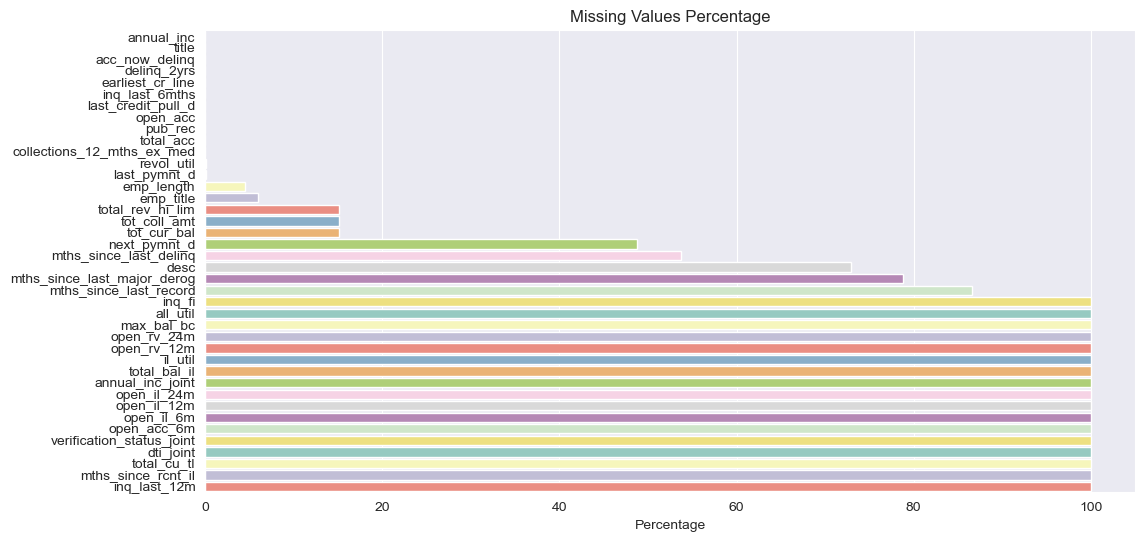

In [4]:
missing_percentage = show_missing_percentage(df)

In [5]:
missing_percentage

annual_inc                       0.00
title                            0.00
acc_now_delinq                   0.01
delinq_2yrs                      0.01
earliest_cr_line                 0.01
inq_last_6mths                   0.01
last_credit_pull_d               0.01
open_acc                         0.01
pub_rec                          0.01
total_acc                        0.01
collections_12_mths_ex_med       0.03
revol_util                       0.07
last_pymnt_d                     0.08
emp_length                       4.51
emp_title                        5.92
total_rev_hi_lim                15.07
tot_coll_amt                    15.07
tot_cur_bal                     15.07
next_pymnt_d                    48.73
mths_since_last_delinq          53.69
desc                            72.98
mths_since_last_major_derog     78.77
mths_since_last_record          86.57
inq_fi                         100.00
all_util                       100.00
max_bal_bc                     100.00
open_rv_24m 

In [6]:
# Kolom dengan jumlah missing values > 16% akan dibuang
drop_col = missing_percentage.index[missing_percentage > 16.0]
drop_col

Index(['next_pymnt_d', 'mths_since_last_delinq', 'desc',
       'mths_since_last_major_derog', 'mths_since_last_record', 'inq_fi',
       'all_util', 'max_bal_bc', 'open_rv_24m', 'open_rv_12m', 'il_util',
       'total_bal_il', 'annual_inc_joint', 'open_il_24m', 'open_il_12m',
       'open_il_6m', 'open_acc_6m', 'verification_status_joint', 'dti_joint',
       'total_cu_tl', 'mths_since_rcnt_il', 'inq_last_12m'],
      dtype='object')

In [7]:
df = df.drop(drop_col, axis=1)

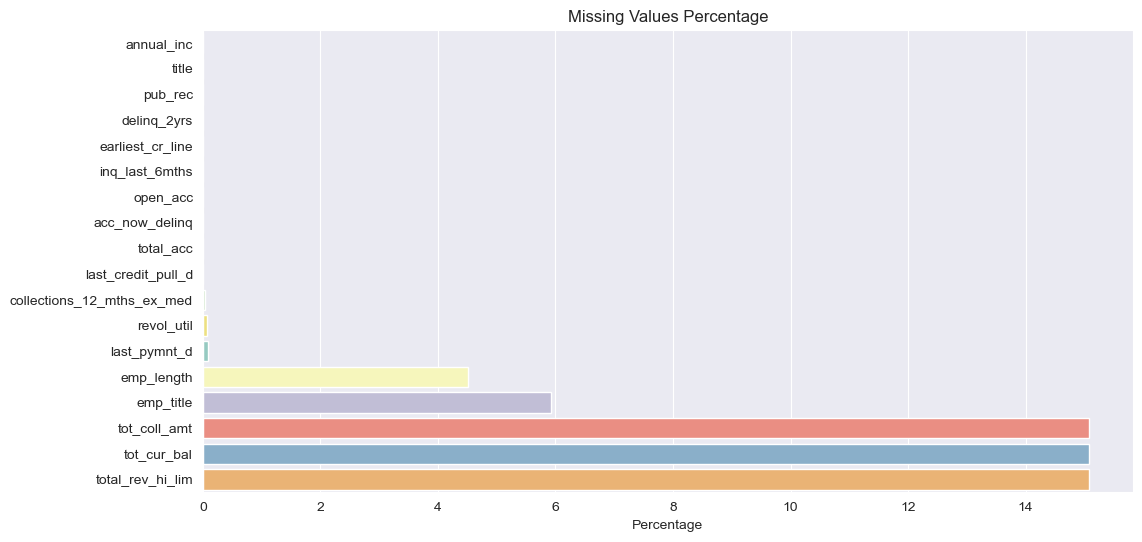

In [8]:
missing_percentage = show_missing_percentage(df)

In [9]:
def fill_nan_random_sample(df: pd.DataFrame, column: str):
    non_missing_values = df[column].dropna()
    random_samples = non_missing_values.sample(
        df[column].isna().sum(), replace=True, random_state=42
    )

    df.loc[df[column].isna(), column] = random_samples.values

    return df

In [10]:
# Imputasi missing value dengan random sampling
for col in missing_percentage.index:
    fill_nan_random_sample(df, col)

In [11]:
show_missing_percentage(df)

No missing values found in the DataFrame.


In [12]:
# Membuang kolom kategori yang nilai unique > 35 (noise)
for col in df.select_dtypes("object").columns:
    if len(df[col].value_counts()) > 35:
        print("Remove column: ", col)
        df = df.drop(col, axis=1)

Remove column:  emp_title
Remove column:  issue_d
Remove column:  url
Remove column:  title
Remove column:  zip_code
Remove column:  addr_state
Remove column:  earliest_cr_line
Remove column:  last_pymnt_d
Remove column:  last_credit_pull_d


### Univariate Analysis

-   Plotting numerical columns value distributions
-   Plotting categorical columns value distributions


In [ ]:
def numerical_distribution(df: pd.DataFrame, type="box"):
    num_cols = df.select_dtypes("number").columns
    rows, cols = int(np.ceil(len(num_cols) / 4)), 4

    plt.figure(figsize=(24, 24))
    for i, col in enumerate(num_cols):
        ax = plt.subplot(rows, cols, i + 1)
        if type == "box":
            sns.boxplot(data=df, x=col, ax=ax)
        else:
            sns.kdeplot(data=df, x=col, fill=True, ax=ax)

        for tick in ax.xaxis.get_major_ticks():
            tick.label1.set_fontsize(12)

        ax.set_xlabel(col, fontsize=24)

    plt.tight_layout()
    plt.show()

In [ ]:
def categorical_distribution(df: pd.DataFrame):
    cat_cols = df.select_dtypes(["object", "category"]).columns

    for i, col in enumerate(cat_cols):
        plt.figure(figsize=(12, 6))
        counts = df[col].value_counts()
        long_label = (
            len(sorted(counts.index.tolist(), key=lambda x: len(x), reverse=True)[0])
            > 10
        )
        sns.barplot(x=counts.index, y=counts.values, palette="Set2")

        if long_label:
            plt.xticks([i for i in range(len(counts.index))], counts.index, rotation=90)

        plt.xlabel(col, fontsize=12)

    plt.show()

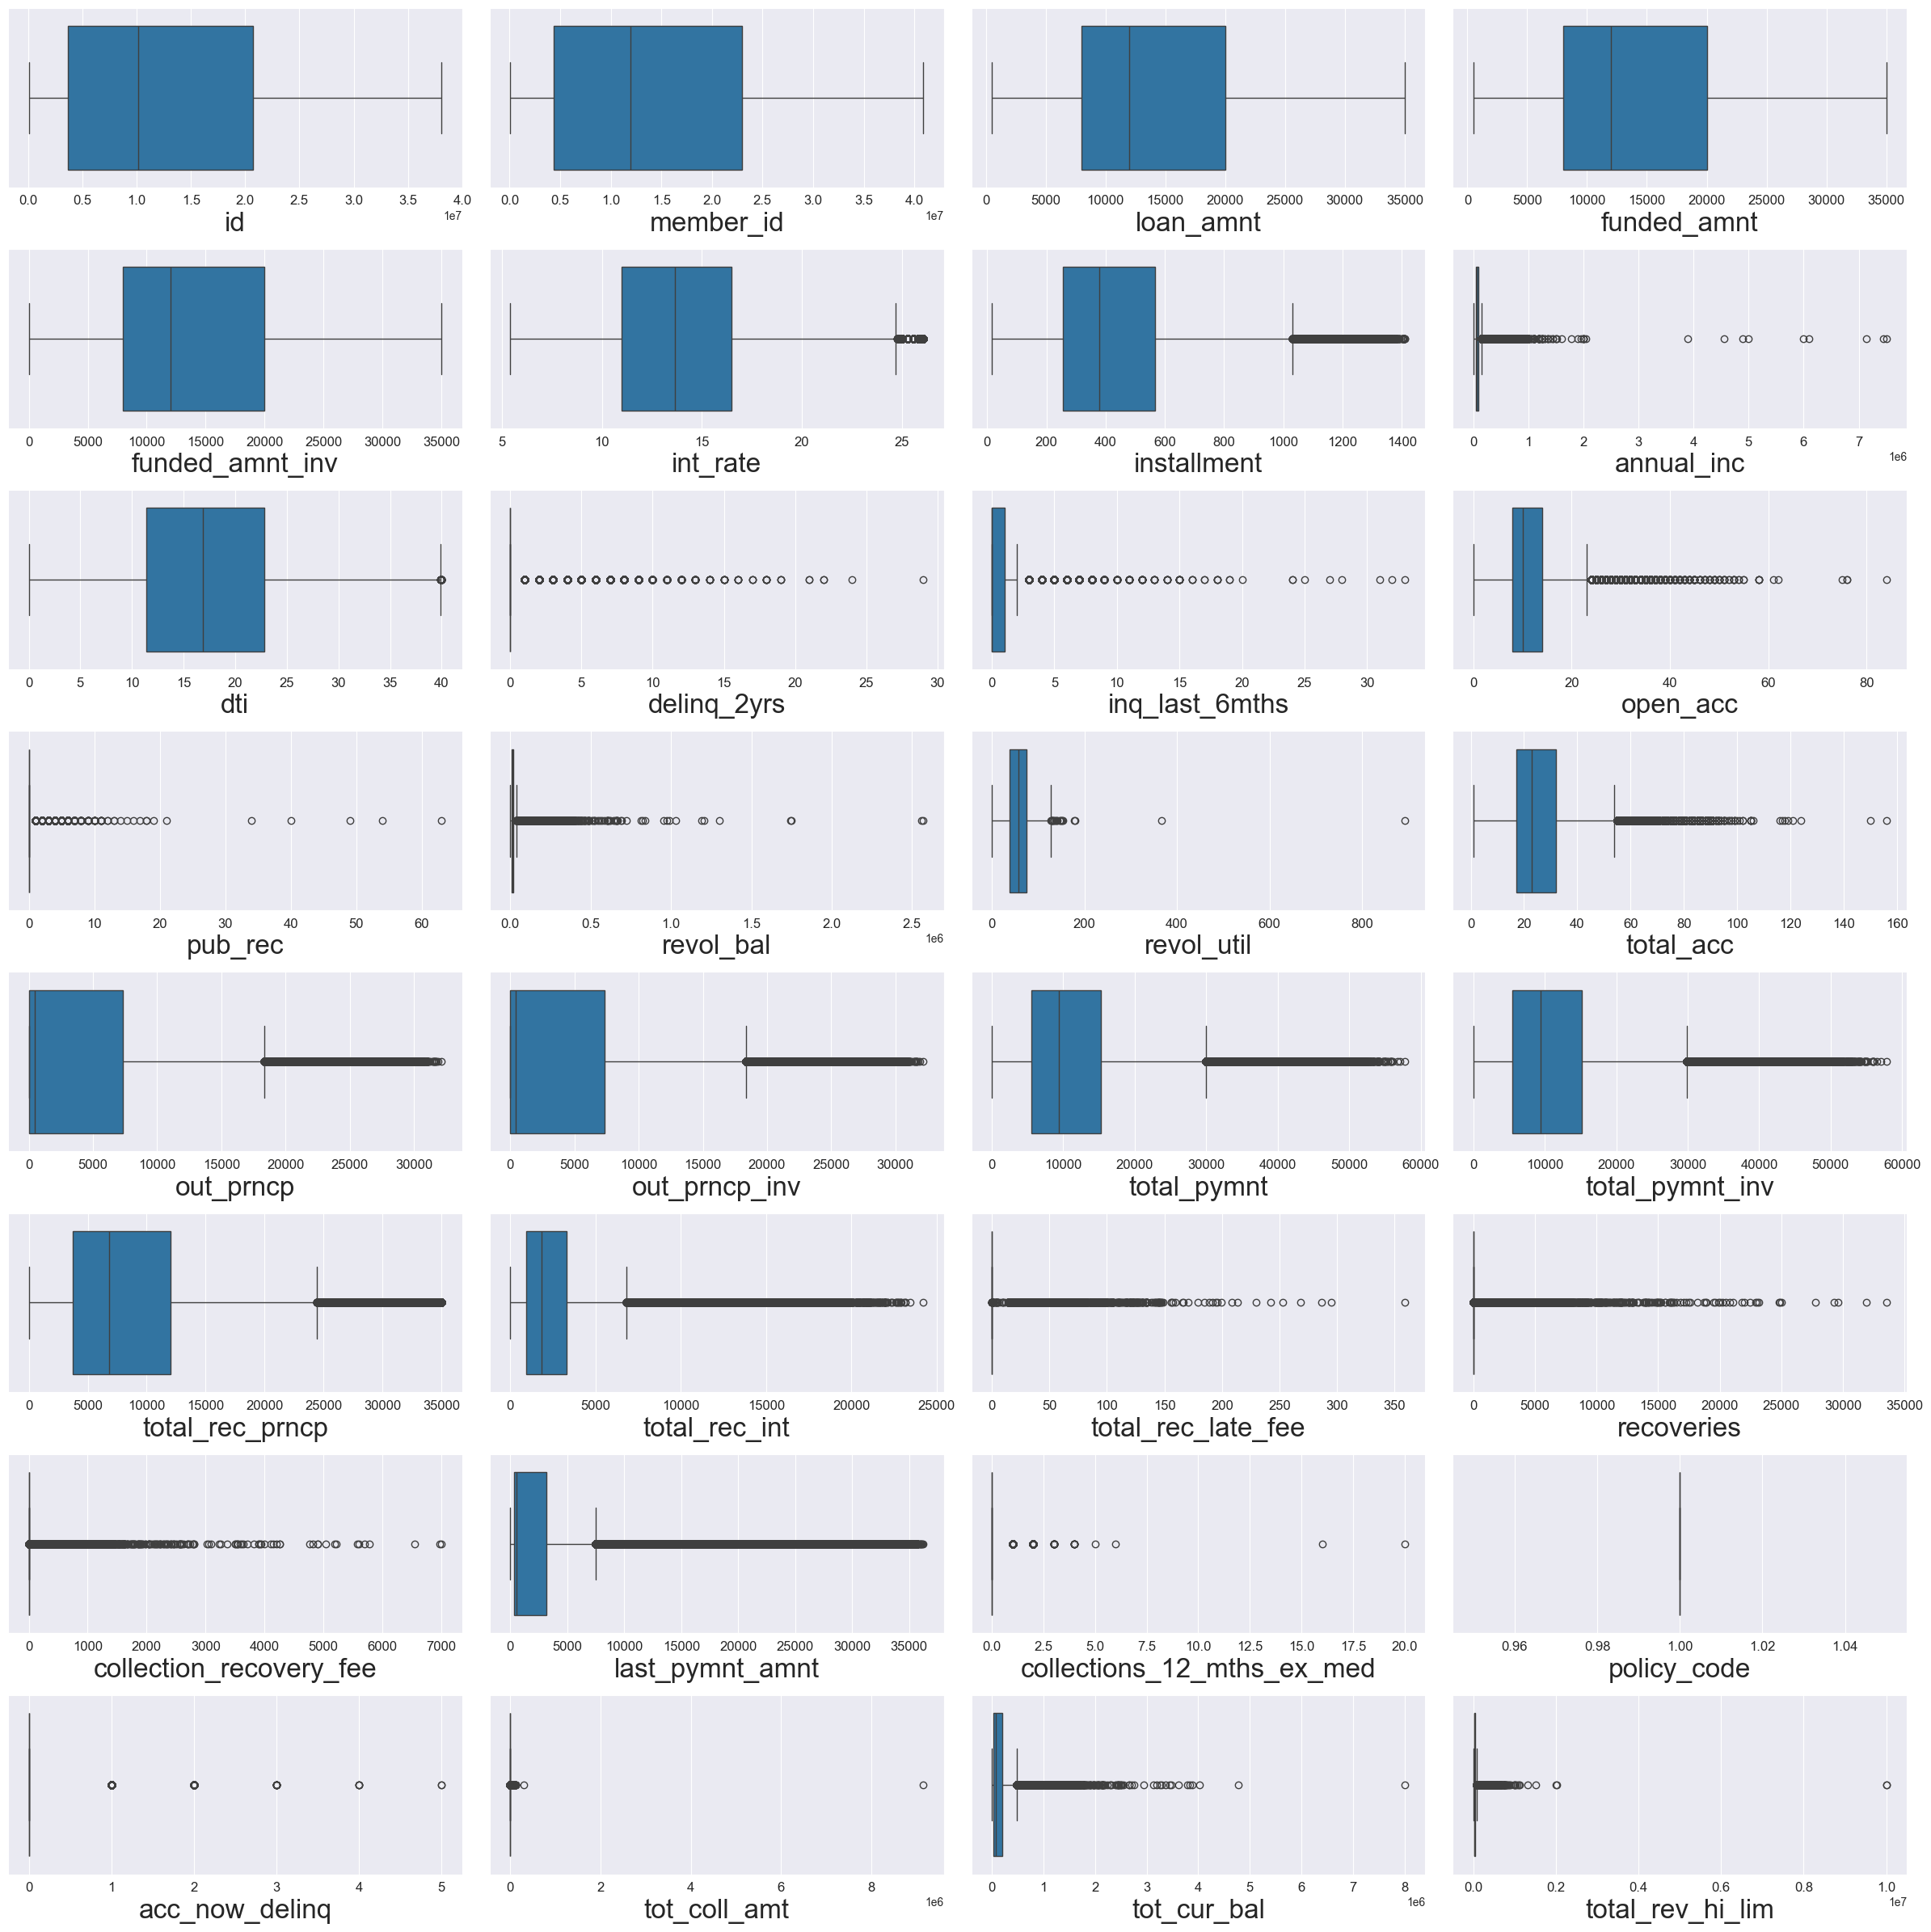

In [ ]:
numerical_distribution(df)

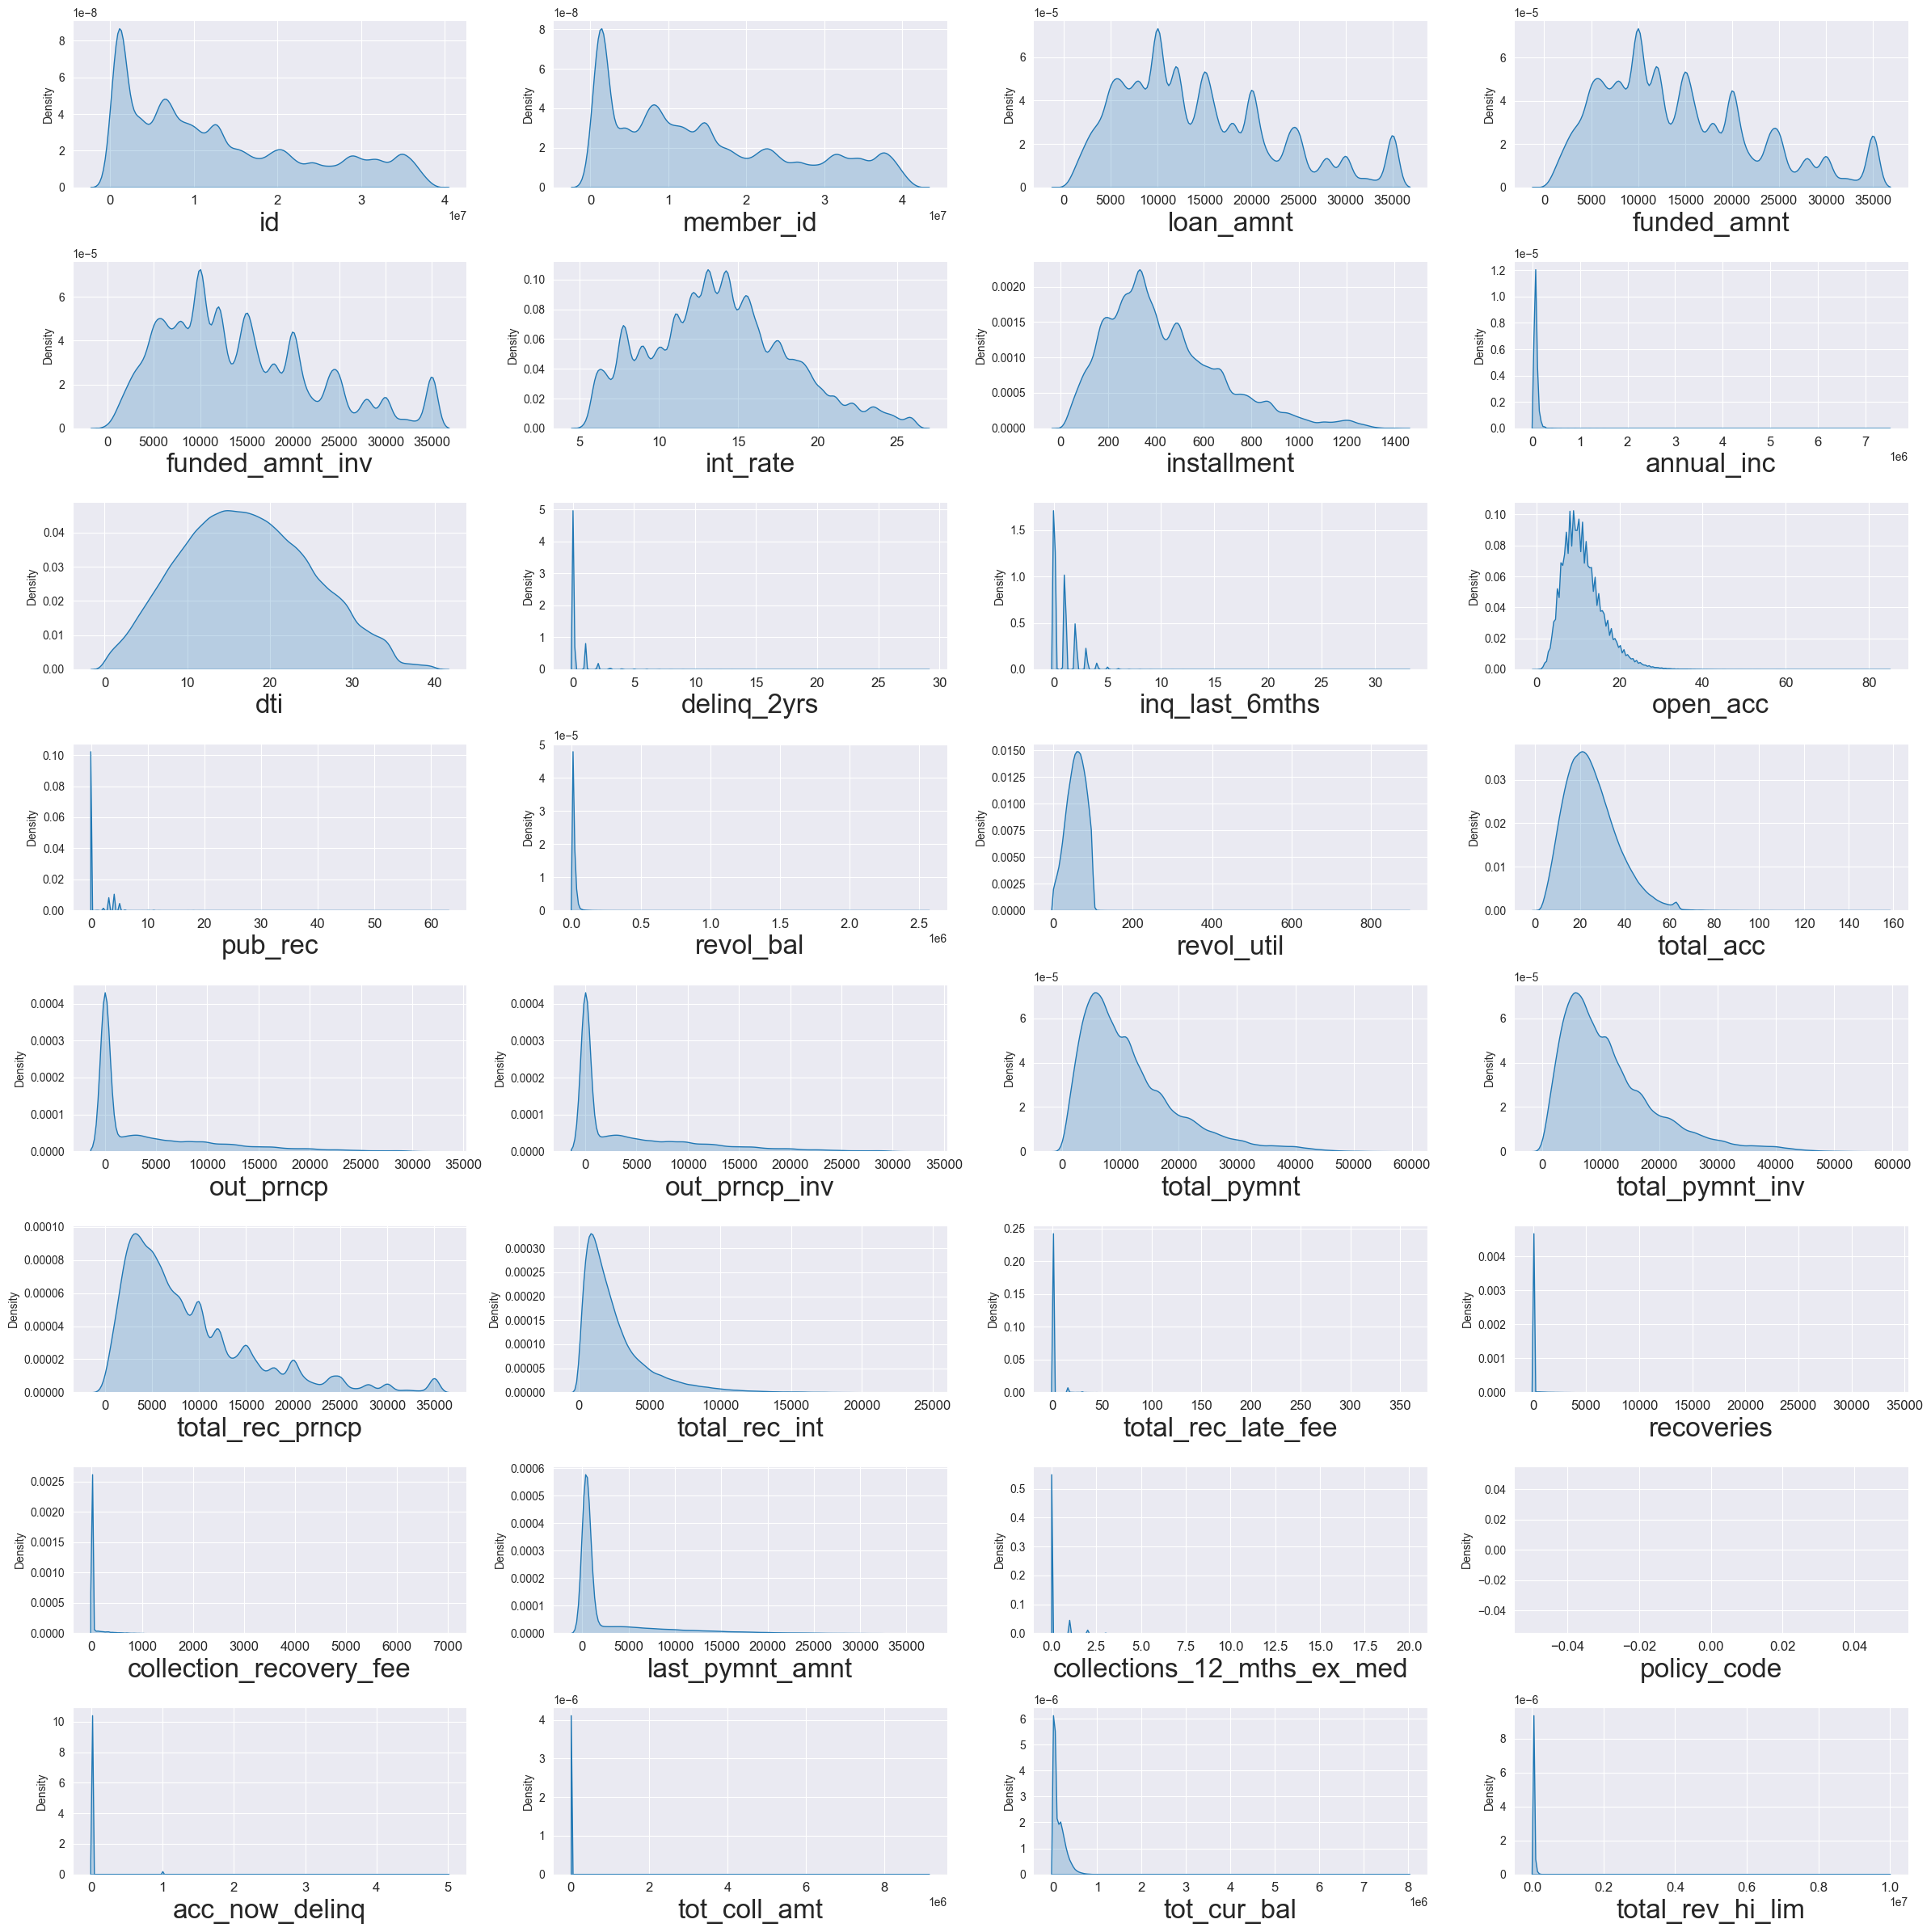

In [ ]:
numerical_distribution(df, "kde")

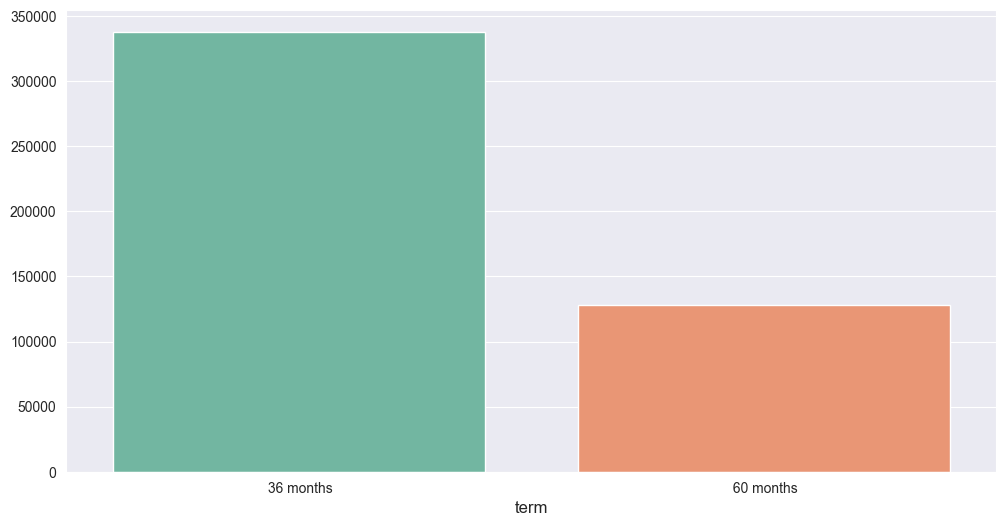

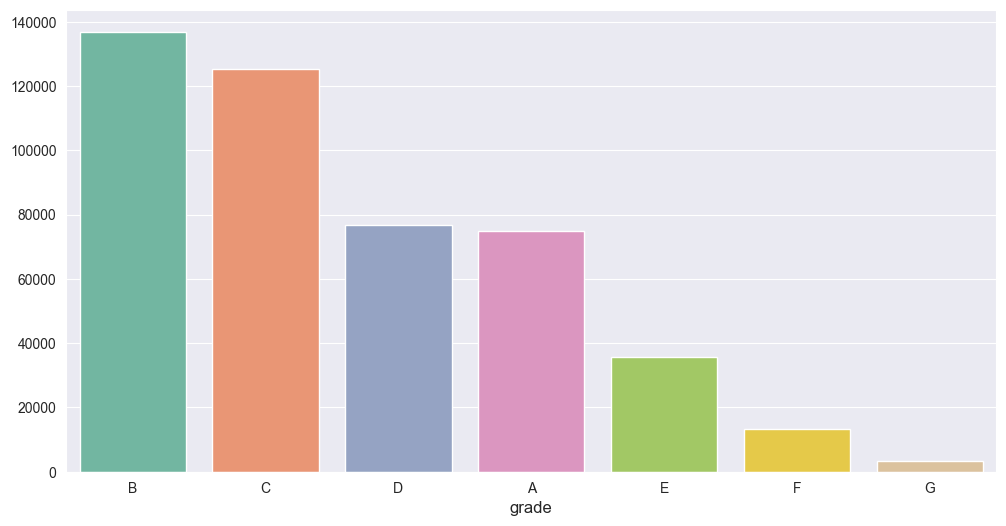

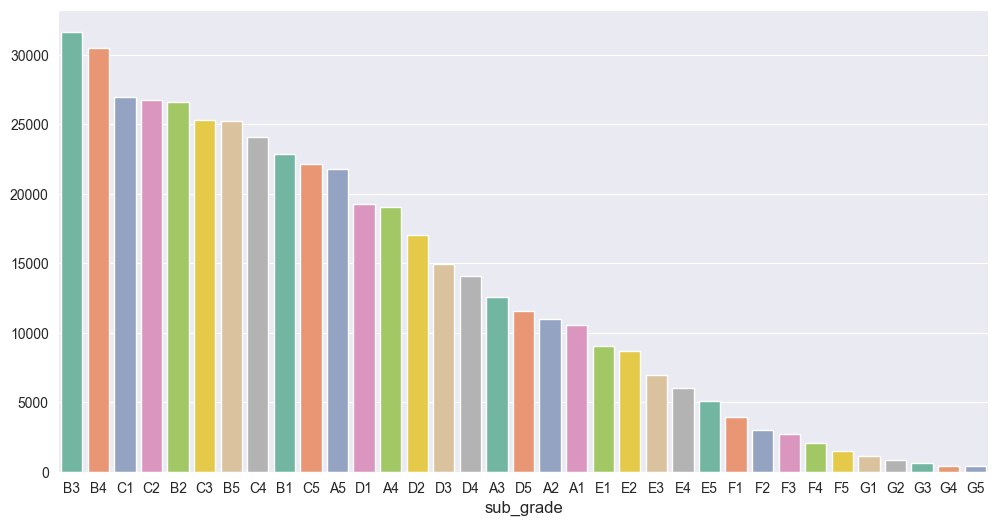

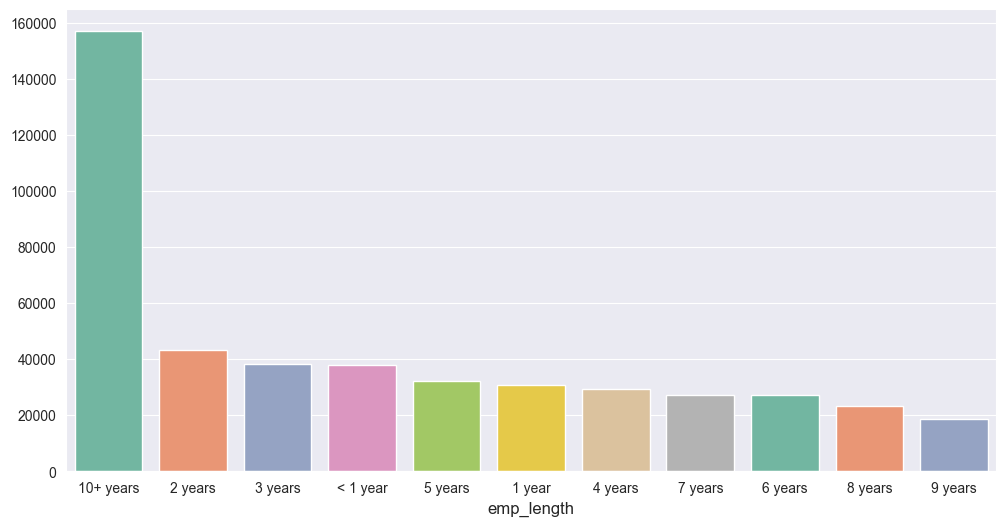

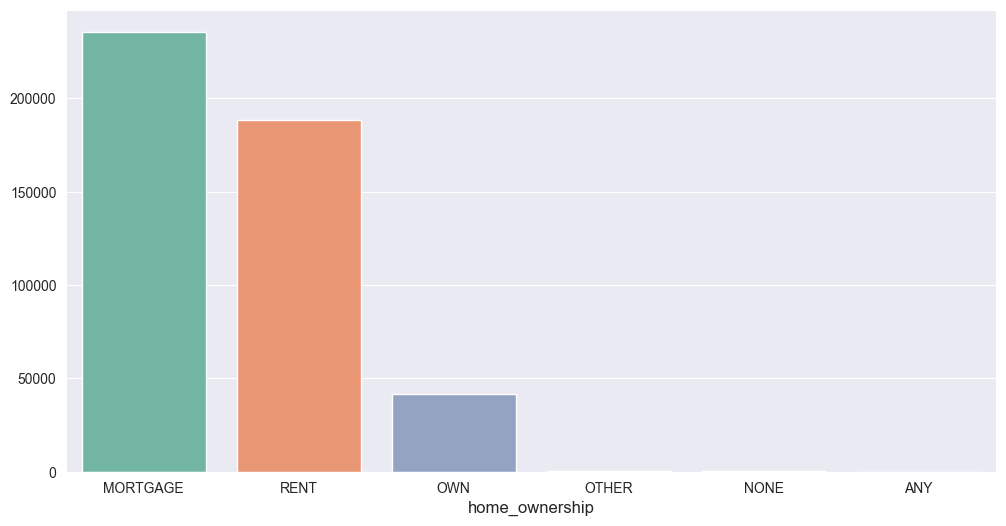

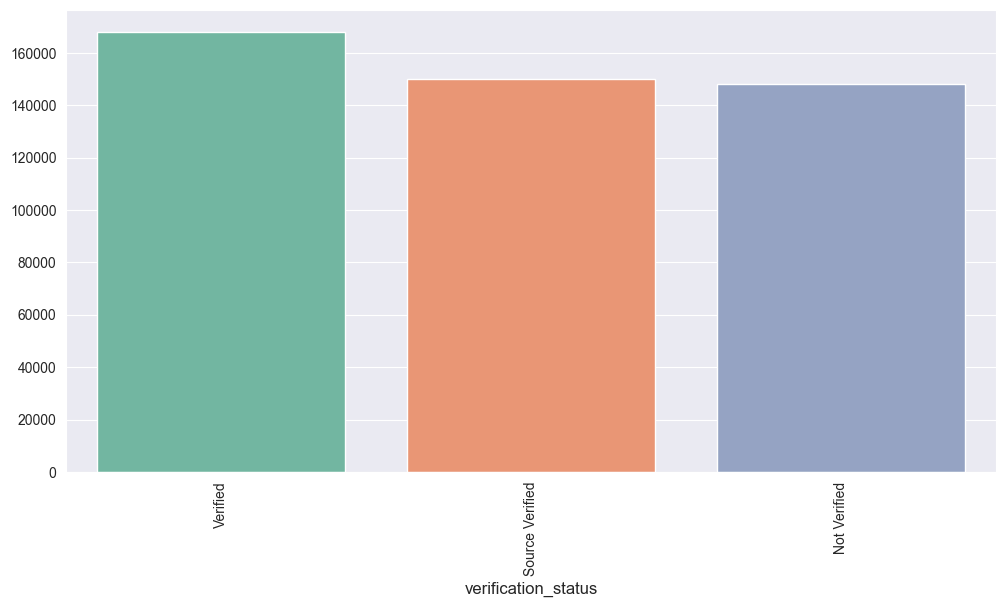

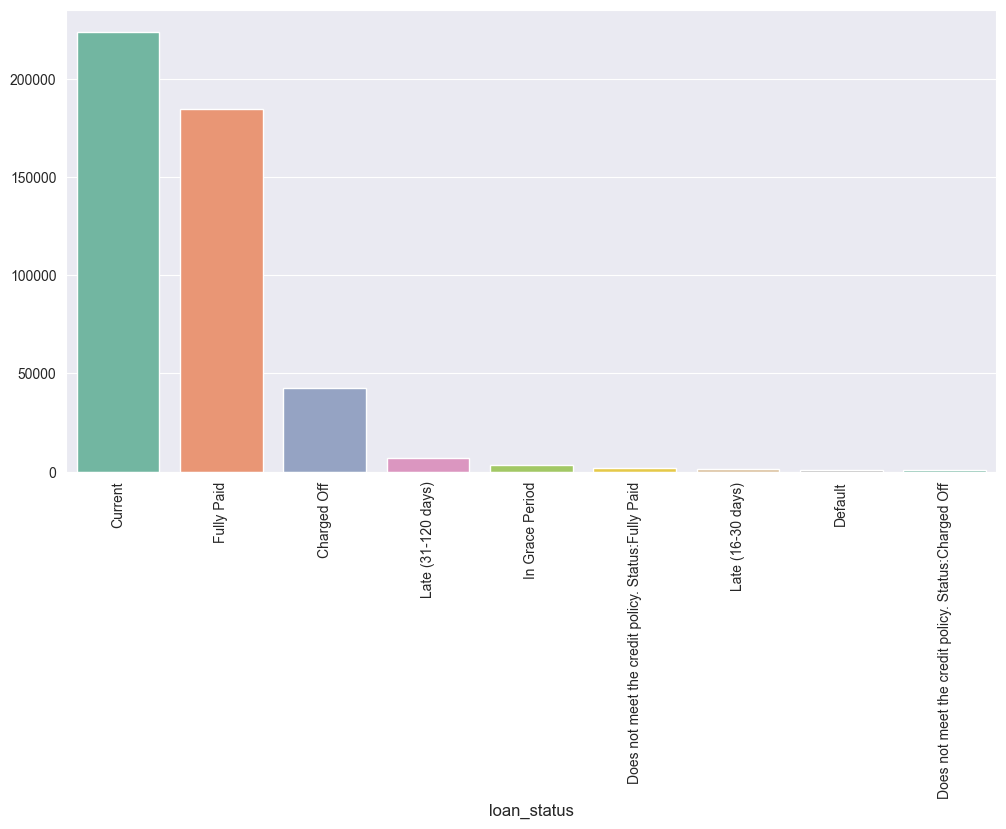

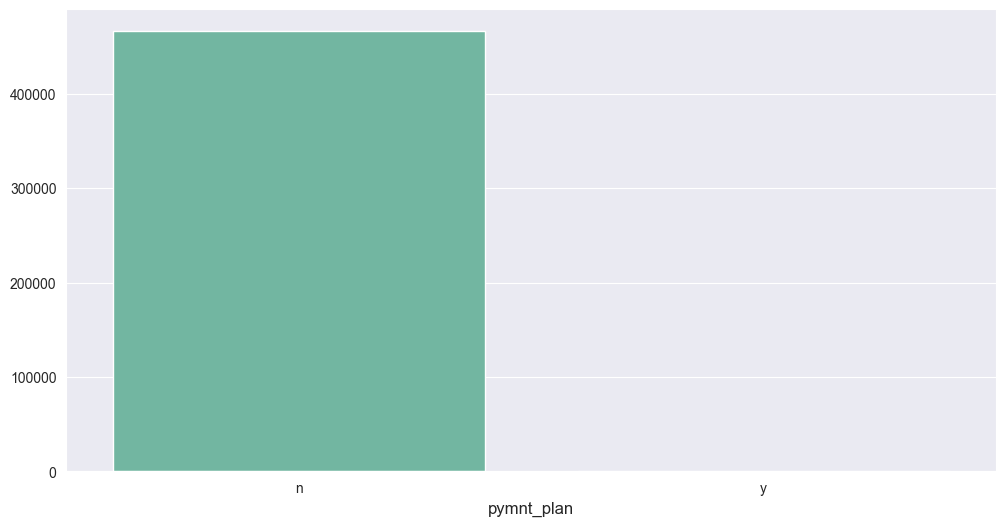

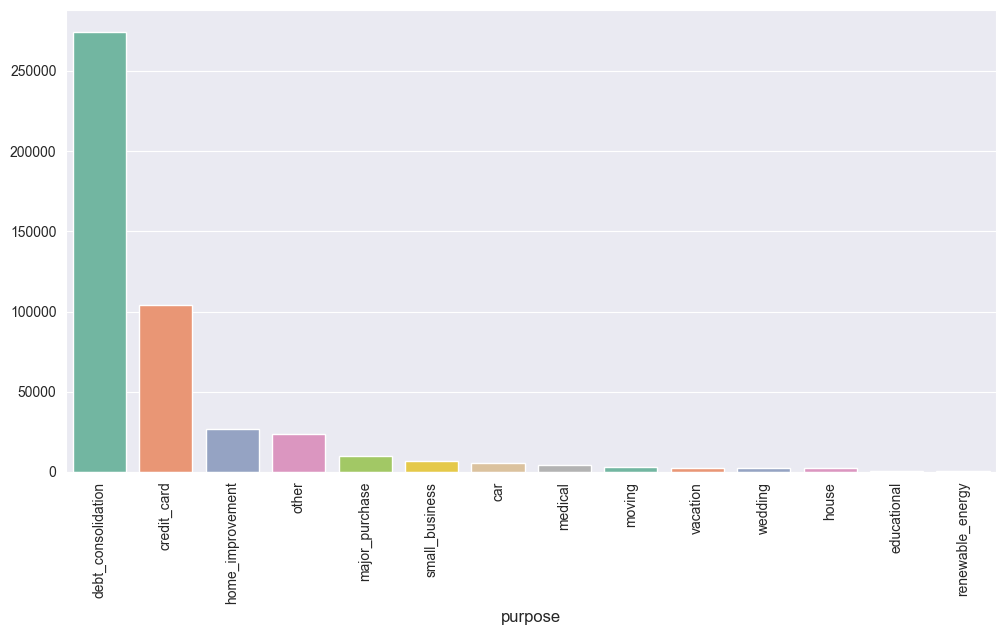

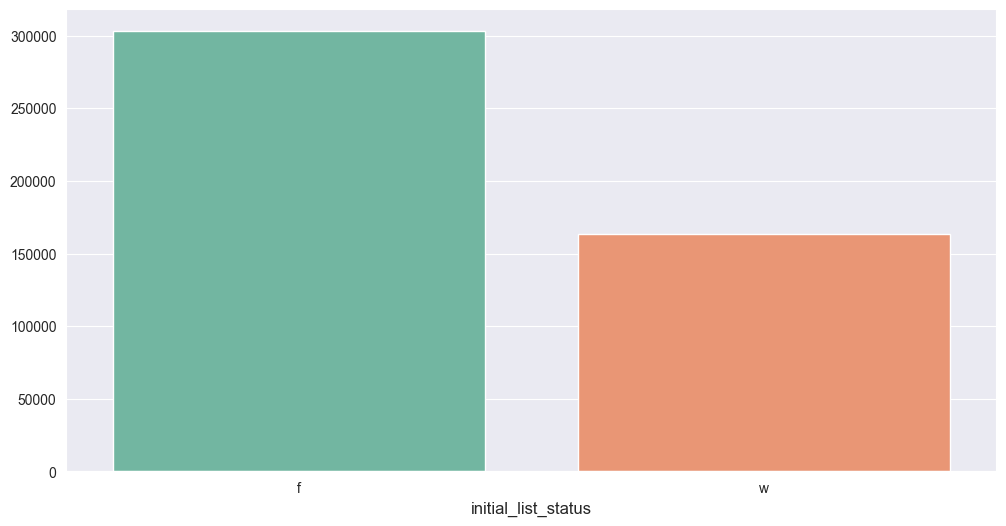

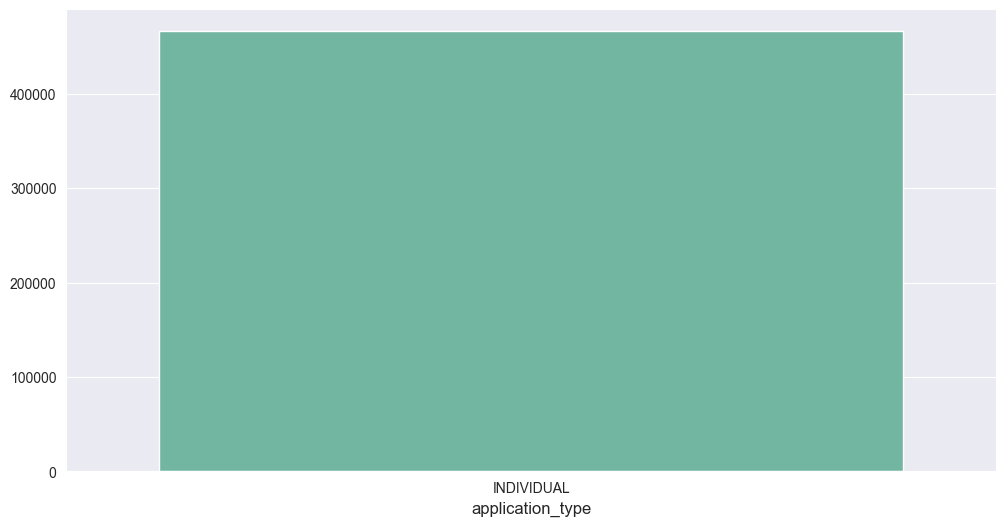

In [ ]:
categorical_distribution(df)

In [ ]:
for col in ["home_ownership", "loan_status", "purpose", "pymnt_plan"]:
    display(
        df.groupby(col)
        .agg({"id": "count"})
        .rename(columns={"id": "total"})
        .sort_values(by="total", ascending=False)
        .reset_index()
    )

home_ownership   total
0       MORTGAGE  235875
1           RENT  188473
2            OWN   41704
3          OTHER     182
4           NONE      50
5            ANY       1

loan_status   total
0                                            Current  224226
1                                         Fully Paid  184739
2                                        Charged Off   42475
3                                 Late (31-120 days)    6900
4                                    In Grace Period    3146
5  Does not meet the credit policy. Status:Fully ...    1988
6                                  Late (16-30 days)    1218
7                                            Default     832
8  Does not meet the credit policy. Status:Charge...     761

purpose   total
0   debt_consolidation  274195
1          credit_card  104157
2     home_improvement   26537
3                other   23690
4       major_purchase    9828
5       small_business    7013
6                  car    5397
7              medical    4602
8               moving    2994
9             vacation    2487
10             wedding    2343
11               house    2269
12         educational     422
13    renewable_energy     351

pymnt_plan   total
0          n  466276
1          y       9

#### According to the columns value distribution plots, there are some columns that only have one values and some columns that have dominant values, hence we're removing the columns as it not very useful.


In [13]:
df = df.drop(
    ["id", "member_id", "pymnt_plan", "application_type", "policy_code"], axis=1
)
df.loc[:, "acc_now_delinq"] = df["acc_now_delinq"].astype(int).astype(str)
df.loc[:, "home_ownership"] = df["home_ownership"].apply(
    lambda x: "OTHER" if x in ["ANY", "NONE"] else x
)

In [ ]:
# Remove outlier dengan metode IQR
num_cols = df.select_dtypes("number").columns

df_copy = df[num_cols]
Q1 = df_copy.quantile(0.25)
Q3 = df_copy.quantile(0.75)
IQR = Q3 - Q1
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR

print(f"Before removing outlier {df.shape}")
print(
    f"After removing outlier {df_copy[~((df_copy < LB) | (df_copy > UB)).any(axis=1)].shape}"
)
print(
    f"Total data removed {df.shape[0] - df_copy[~((df_copy < LB) | (df_copy > UB)).any(axis=1)].shape[0]} rows"
)

Before removing outlier (466285, 38)
After removing outlier (161794, 28)
Total data removed 304491 rows


##### Huft... that's a lot of data to remove, so we're keeping those rows

##### Next we're choosing the label base on loan_status feature

-   Good Debt: Fully Paid, Does not meet the credit policy. Status:Fully Paid, Current, In Grace Period
-   Bad Debt: Charged Off, Does not meet the credit policy. Status:Charged Off, Late (16-30 days), Late (31-120 days), Default


In [14]:
good = [
    "Fully Paid",
    "Does not meet the credit policy. Status:Fully Paid",
    "Current",
    "In Grace Period",
]
bad = [
    "Charged Off",
    "Does not meet the credit policy. Status:Charged Off",
    " Late (16-30 days)",
    "Late (31-120 days)",
    "Default",
]

In [15]:
df.loc[:, "loan_status"] = df["loan_status"].apply(
    lambda x: "GOOD" if x in good else "BAD"
)

<AxesSubplot: xlabel='loan_status', ylabel='count'>

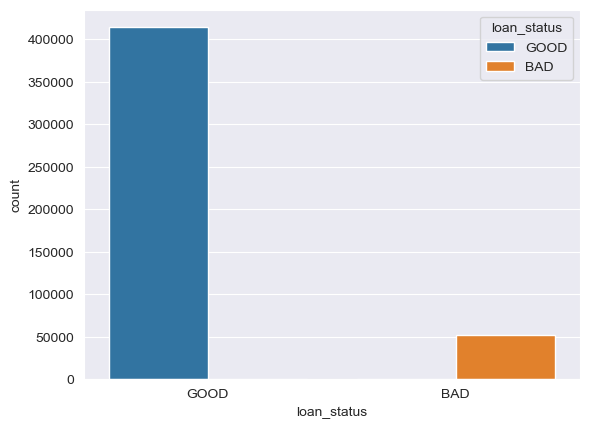

In [ ]:
sns.countplot(data=df, x="loan_status", hue="loan_status")

### Multivariate Analysis

-   Plotting columns value distributions to label


In [15]:
obv_cols = [
    "loan_amnt",
    "funded_amnt",
    "funded_amnt_inv",
    "total_pymnt",
    "last_pymnt_amnt",
    "loan_status",
]

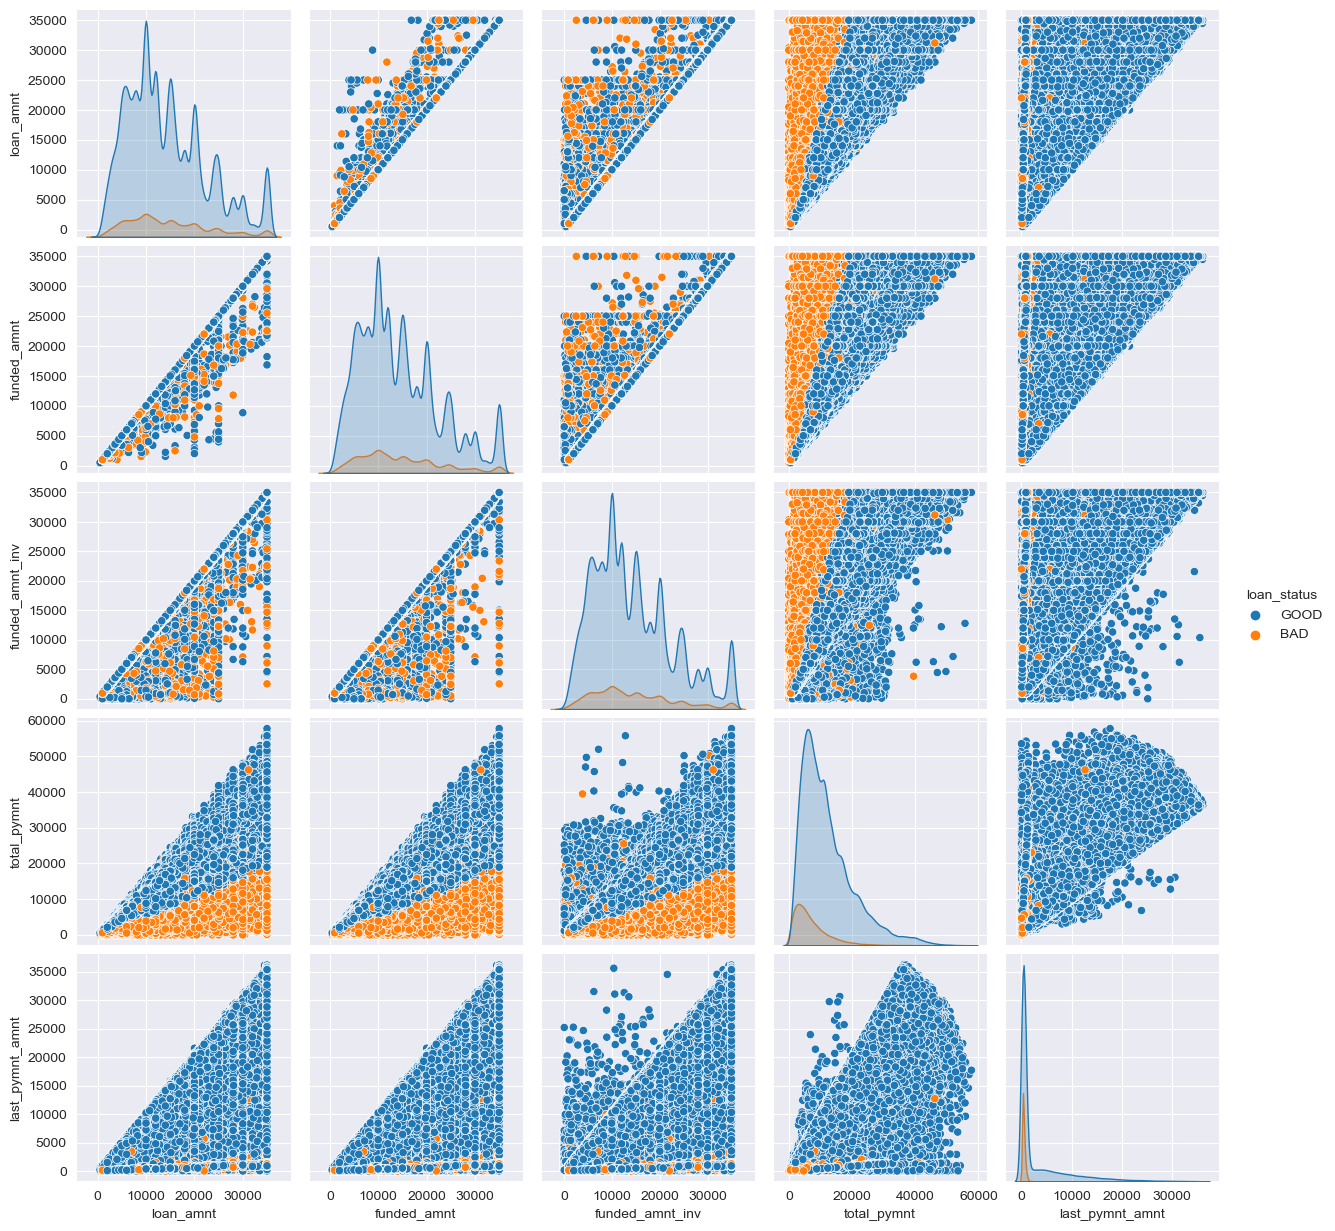

In [ ]:
sns.pairplot(df[obv_cols], diag_kind="kde", hue="loan_status")

In [17]:
kmeans = KMeans(n_clusters=2, random_state=42)
loan_clusters = kmeans.fit_predict(df[obv_cols[:-1]])

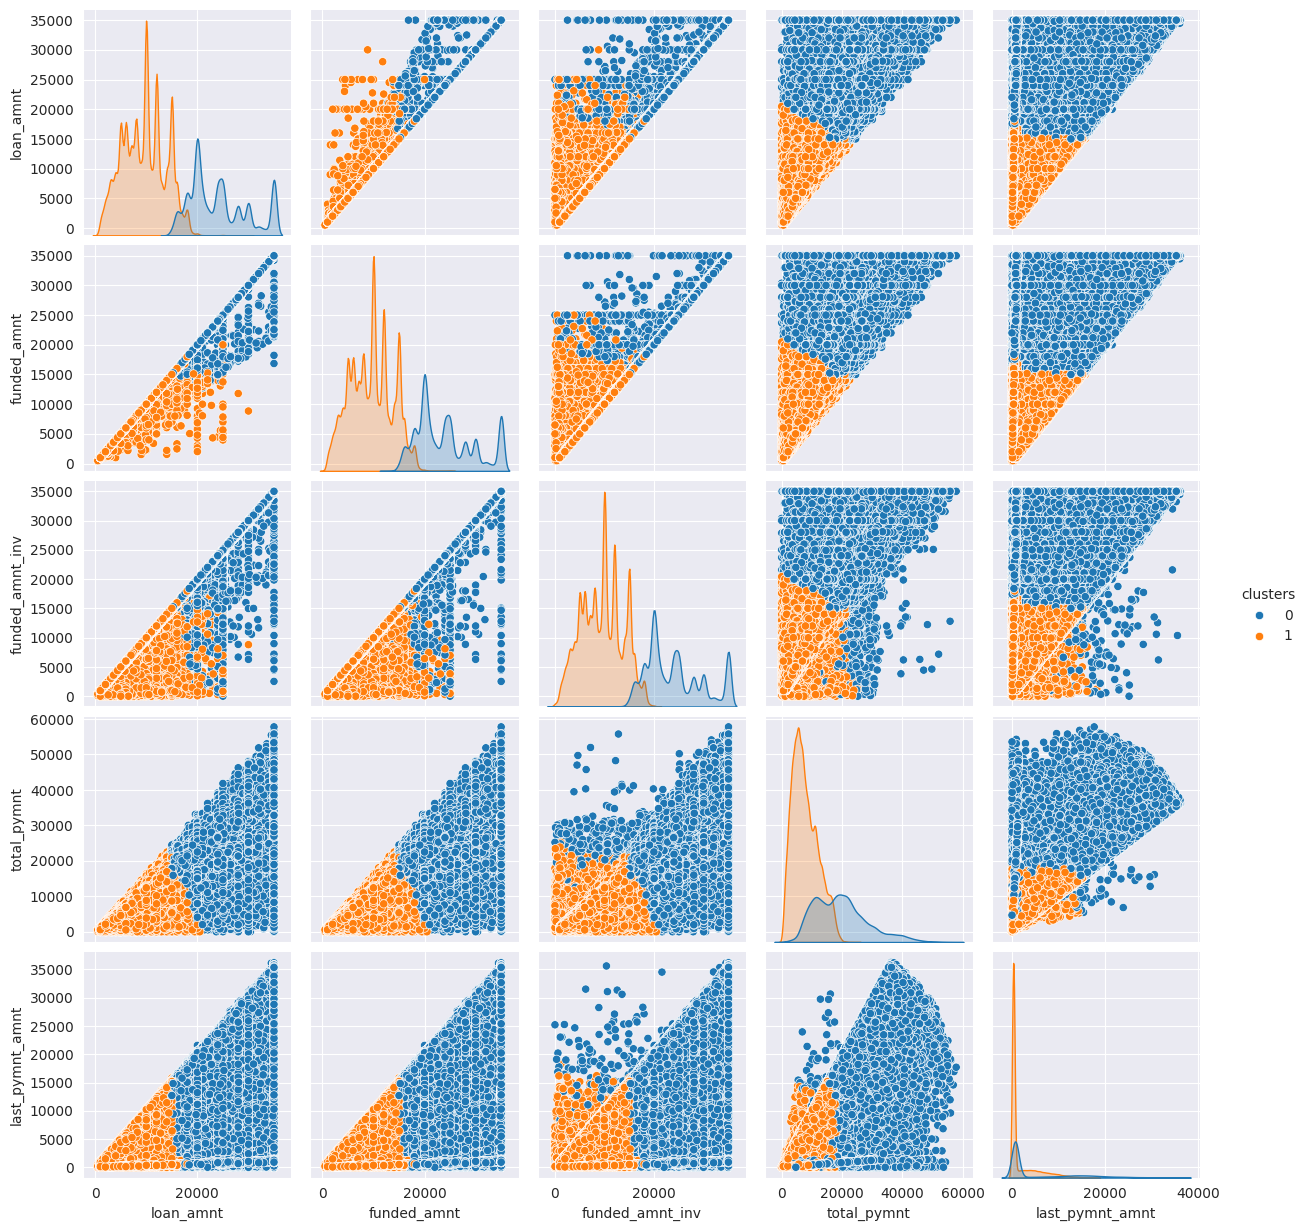

In [20]:
df_clusters = df.copy()
df_clusters["clusters"] = loan_clusters
sns.pairplot(df_clusters[obv_cols[:-1] + ["clusters"]], diag_kind="kde", hue="clusters")

In [ ]:
cat_cols = df.select_dtypes("object").columns.drop(["sub_grade", "loan_status"])

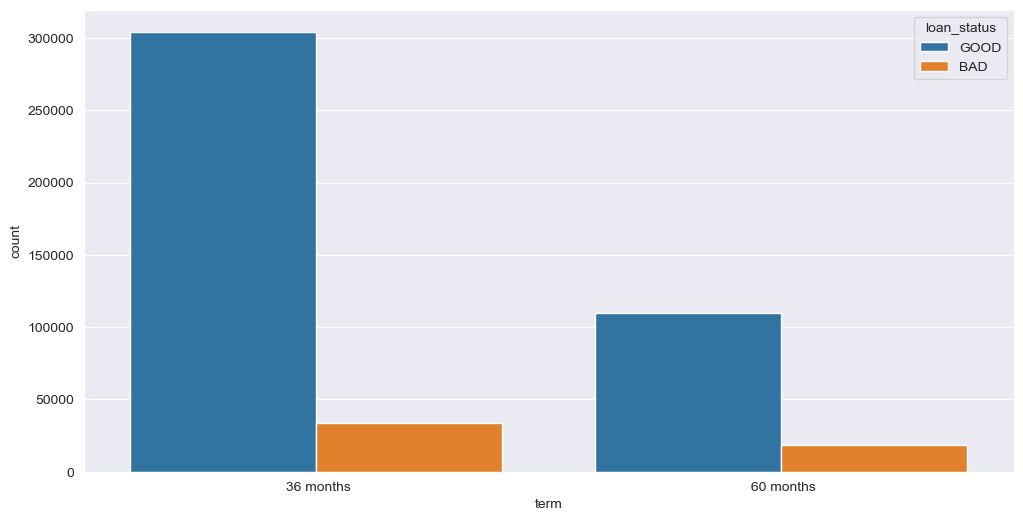

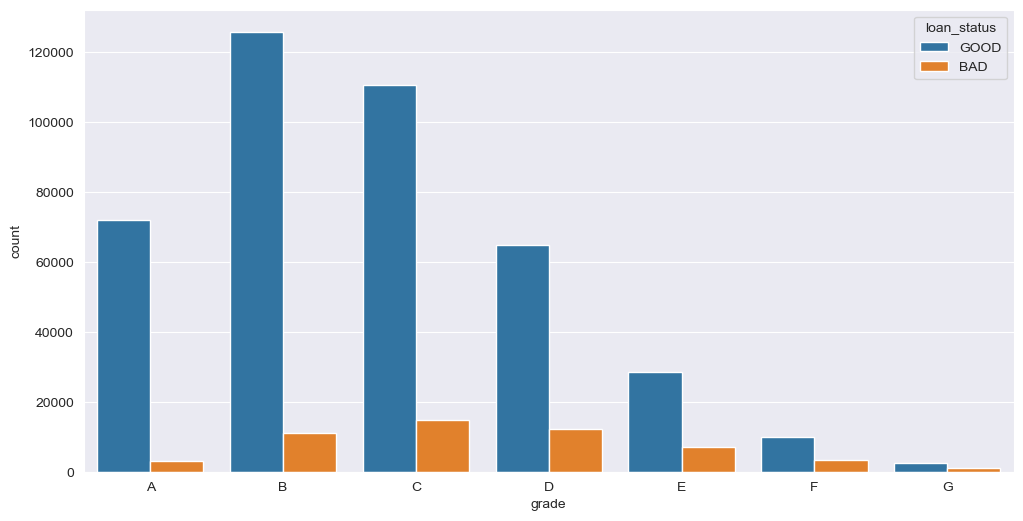

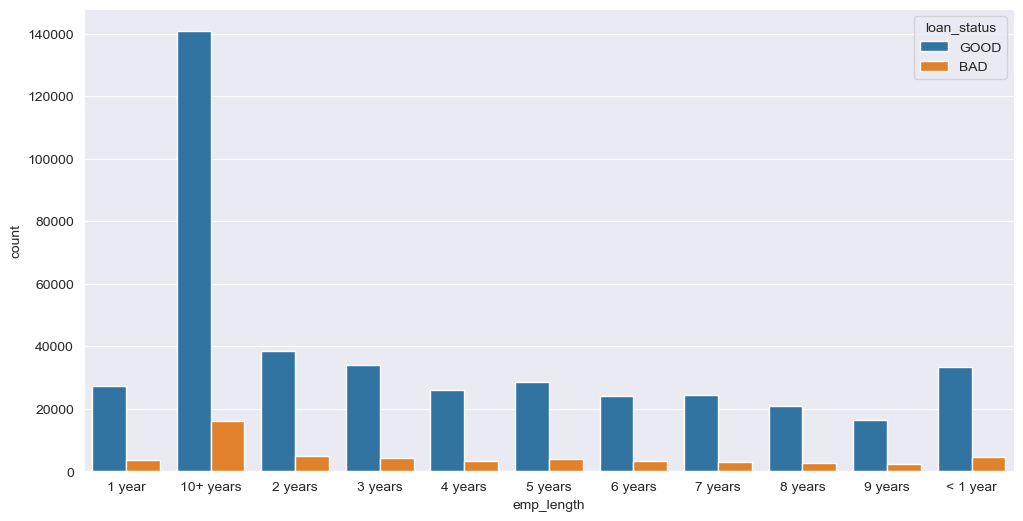

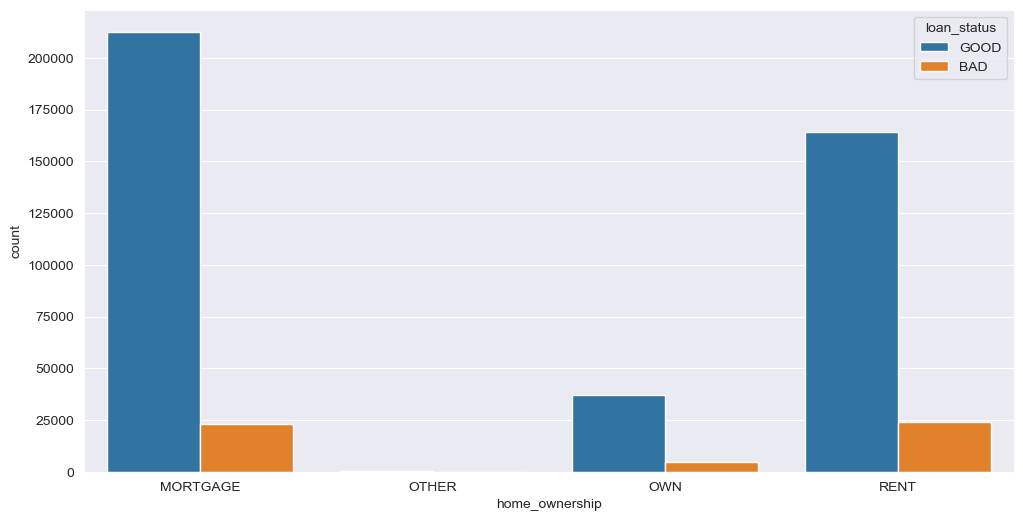

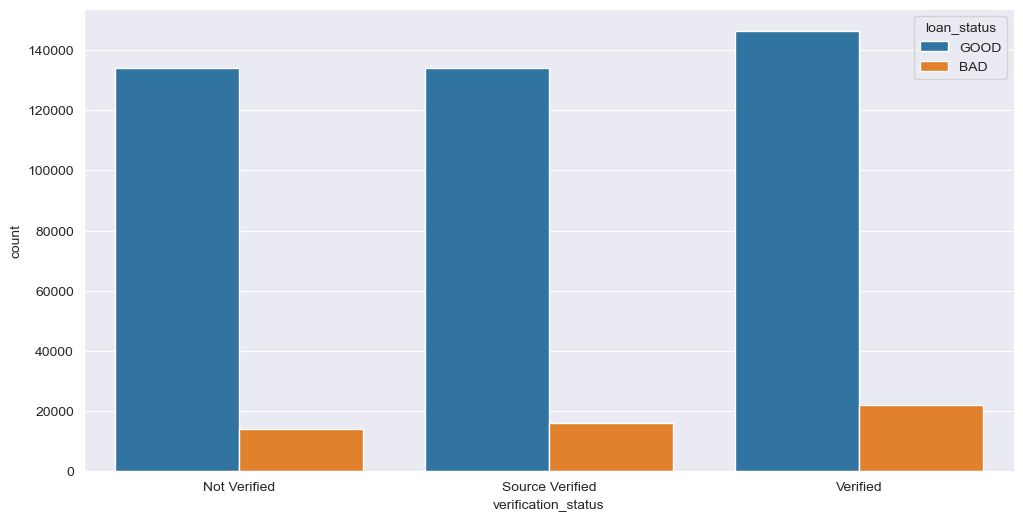

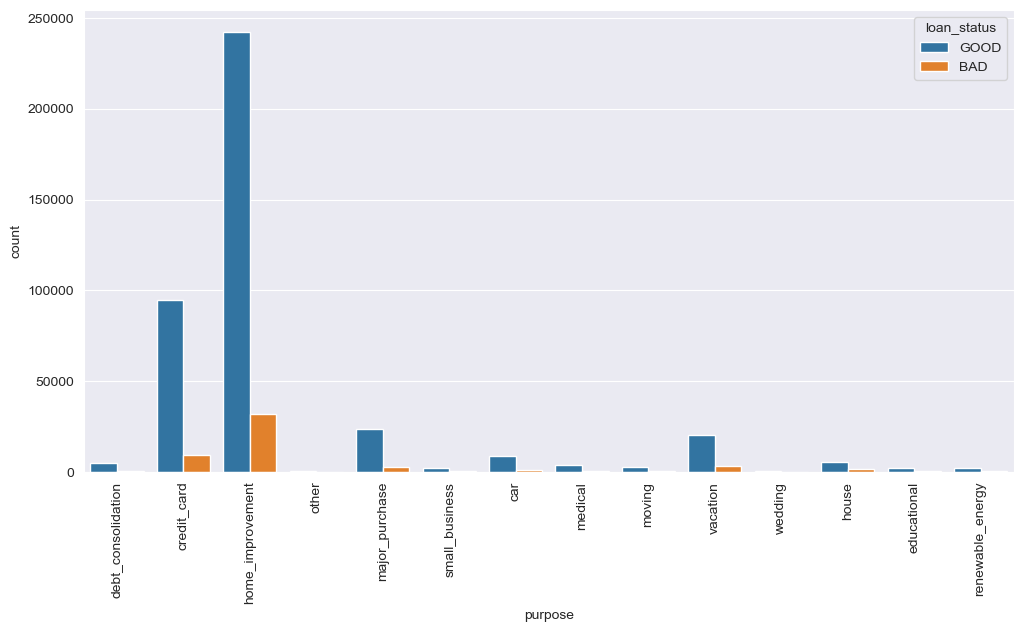

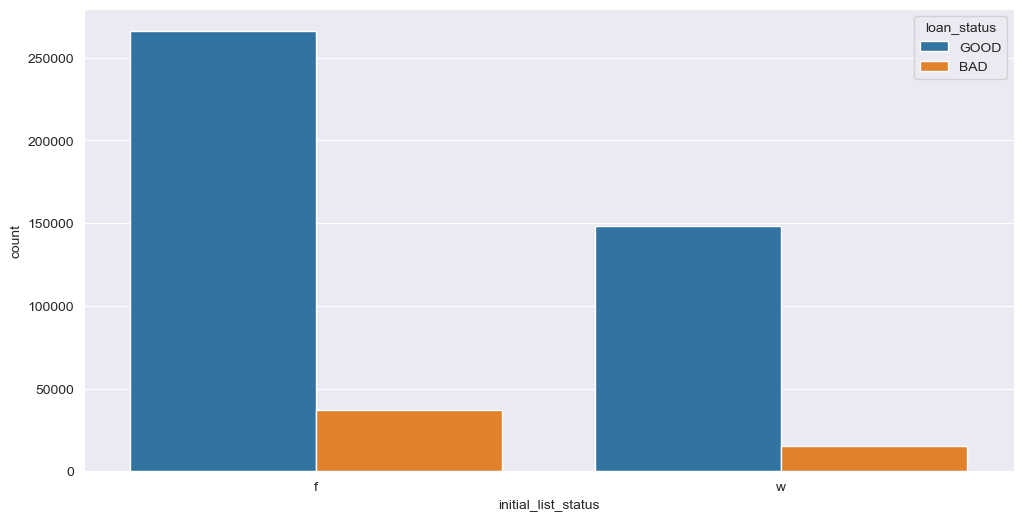

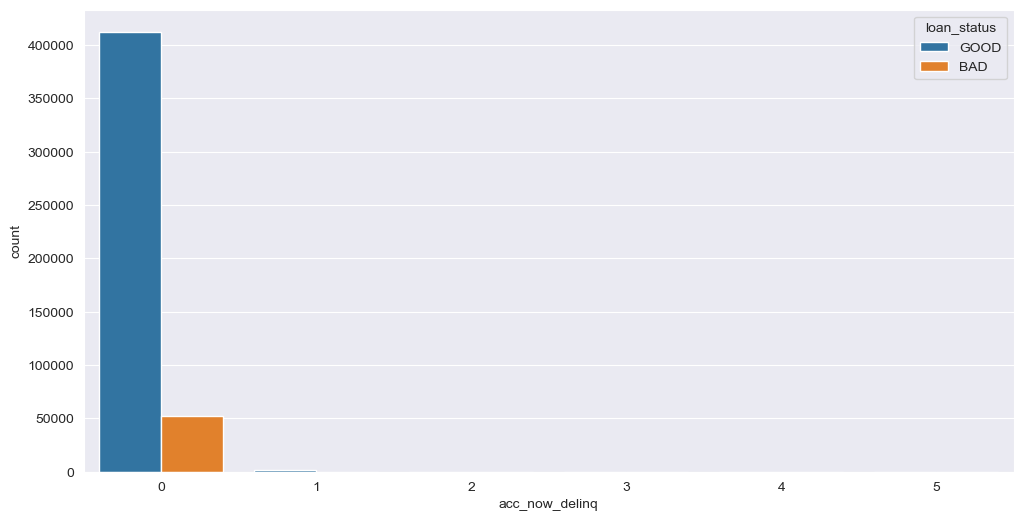

In [ ]:
for cat in cat_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=df[cat].sort_values(), hue=df["loan_status"])
    if cat == "purpose":
        ticks = df[cat].value_counts().index
        plt.xticks([i for i in range(len(ticks))], ticks, rotation=90)
    plt.show()

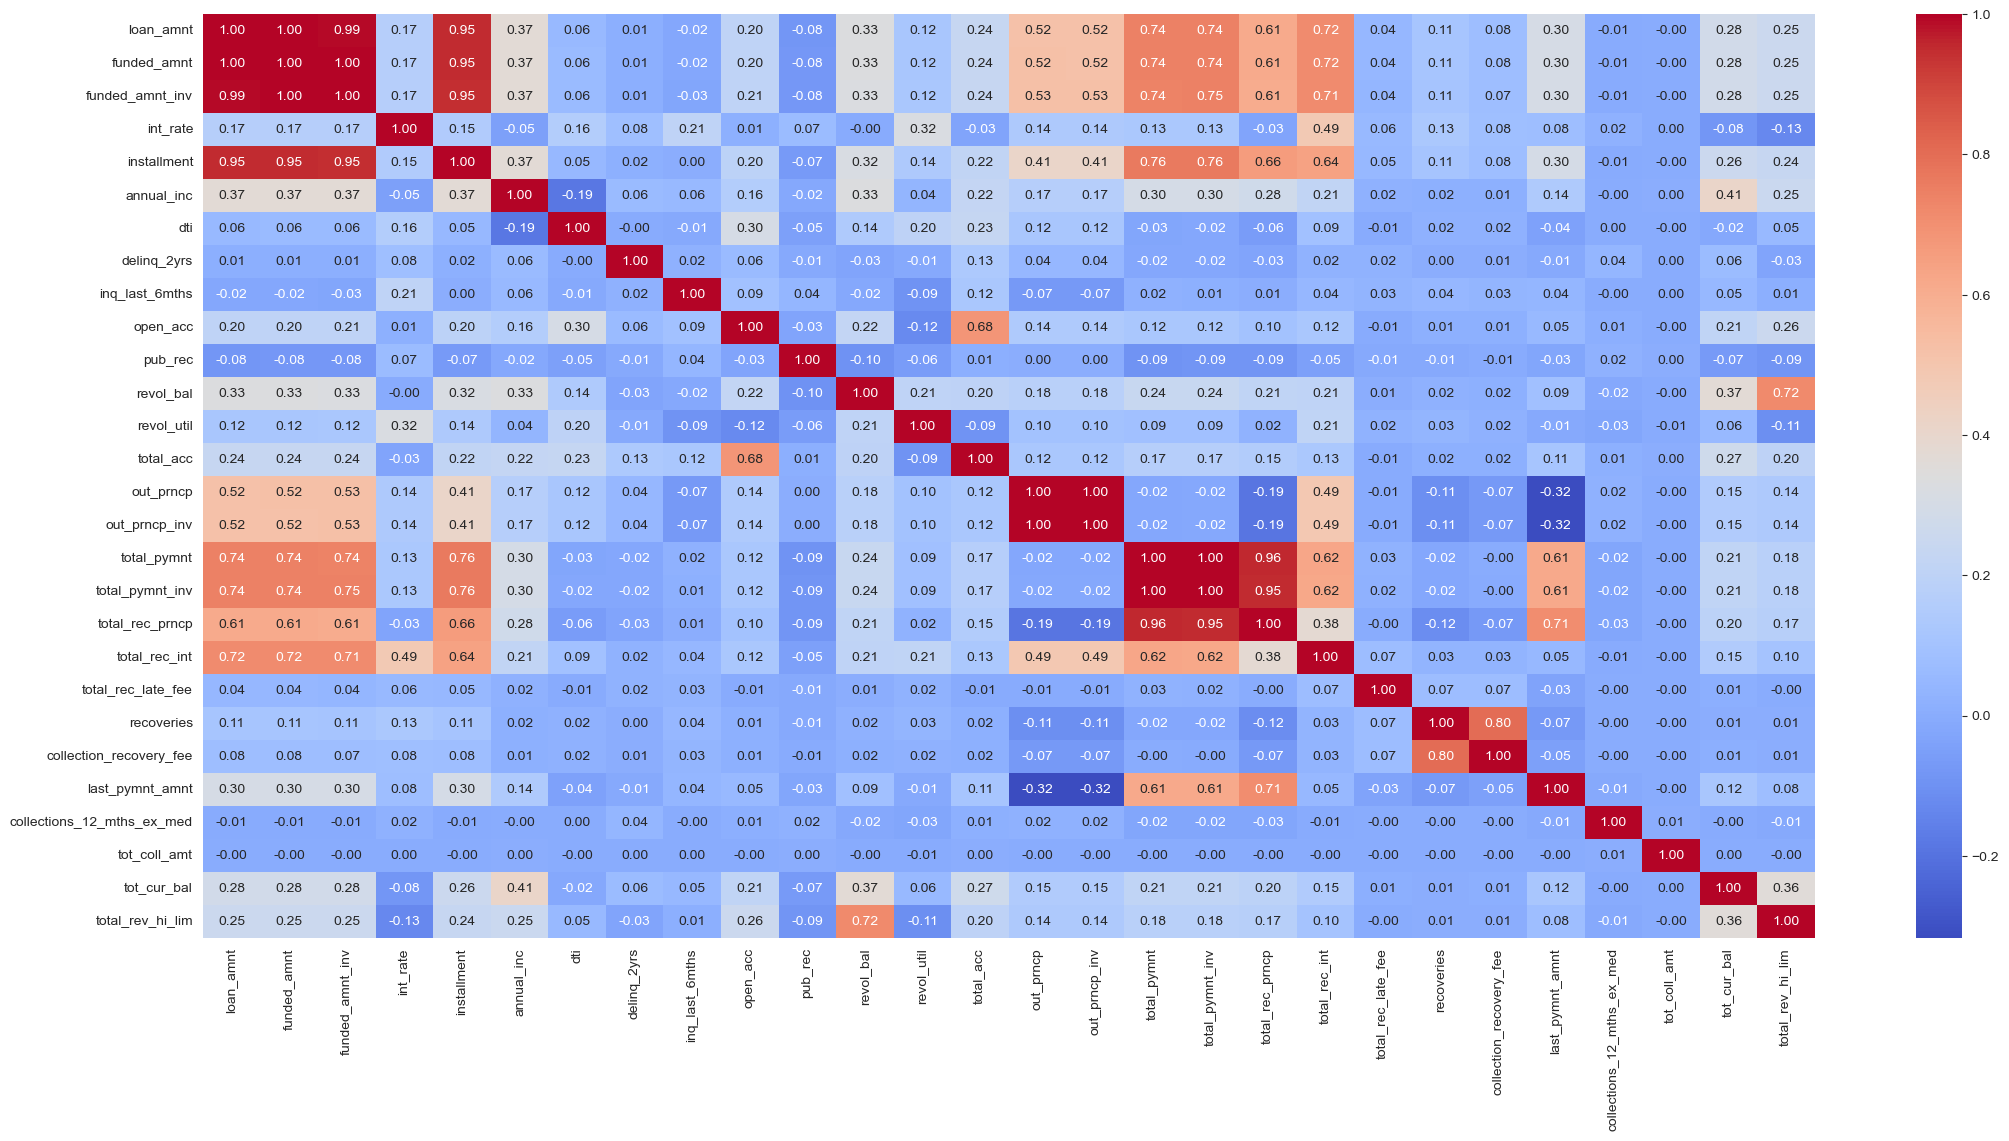

In [ ]:
plt.figure(figsize=(26, 12))
sns.heatmap(df.corr(), fmt=".2f", annot=True, cmap="coolwarm")
plt.show()

#### Based on the multivariate analysis, we can see that some features have strong correlation, however, there are also quite a few features that do not have any correlation.

-   Most bad loan came from Grade C and D, with employment length of 10+ Years
-   Most loan was used for home improvement and credit card
-   Almost all user doesn't have any account which the borrower is now delinquent


### Data preprocessing

-   Reduce feature dimension with PCA (combine high correlation feature into one)
-   Split data into train & test with ratio 90% train & 10% test
-   Scaling numerical features with StandardScaler / MinMaxScaler
-   Encode categorical features with OneHotEncoder / LabelEncoder
-   Over sample only the train set (preventing data leakage)


In [16]:
high_cor1 = ["loan_amnt", "funded_amnt", "funded_amnt_inv", "installment"]
high_cor2 = ["total_pymnt", "total_pymnt_inv", "total_rec_prncp"]

In [17]:
pca = PCA(n_components=1, random_state=42)

df["pca_1"] = pca.fit_transform(df[high_cor1]).flatten()
df["pca_2"] = pca.fit_transform(df[high_cor2]).flatten()

df = df.drop(high_cor1, axis=1)
df = df.drop(high_cor2, axis=1)

<Axes: xlabel='pca_1', ylabel='pca_2'>

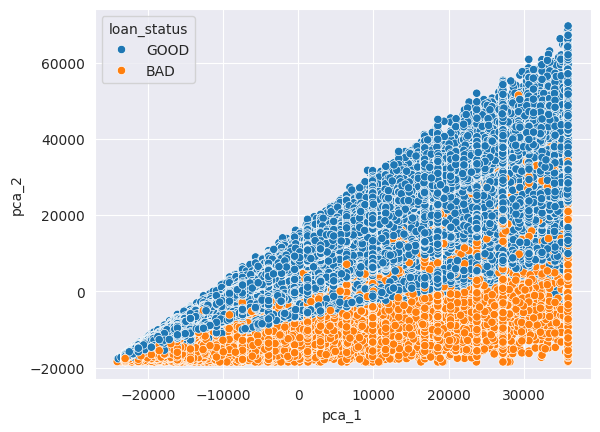

In [21]:
sns.scatterplot(x=df["pca_1"], y=df["pca_2"], hue=df["loan_status"])

In [18]:
X = df.drop("loan_status", axis=1)
y = df["loan_status"].map({"GOOD": 1, "BAD": 0})

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)

In [32]:
X_train.shape, X_test.shape

((419656, 41), (46629, 41))

In [29]:
display(y_train.value_counts())
display(y_test.value_counts())

loan_status
1    372689
0     46967
Name: count, dtype: int64

loan_status
1    41410
0     5219
Name: count, dtype: int64

In [20]:
num_cols = X_train.select_dtypes("number").columns
cat_cols = X_train.select_dtypes("object").columns
ohe_cols = [
    "term",
    "home_ownership",
    "verification_status",
    "purpose",
    "initial_list_status",
]

In [21]:
col_trans = ColumnTransformer(
    [
        ("num_pipeline", StandardScaler(), num_cols),
        (
            "ohe_pipeline",
            OneHotEncoder(handle_unknown="ignore", sparse=False),
            ohe_cols,
        ),
    ],
    n_jobs=-1,
)

In [27]:
set_config(display="diagram")
display(col_trans)

ColumnTransformer(n_jobs=-1,
                  transformers=[('num_pipeline', StandardScaler(),
                                 Index(['int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'pca_1', 'pca_2'],
      dtype='object')),
                                ('ohe_pipeline',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['term', 'home_ownership',
                                  'verification_status', 'purpose',
                                  'initial_list_status'])])

In [22]:
encoder = LabelEncoder()
for col in cat_cols.drop(ohe_cols):
    X_train[col] = encoder.fit_transform(X_train[col])
    X_test[col] = encoder.transform(X_test[col])

In [23]:
X_train = col_trans.fit_transform(X_train)
X_test = col_trans.transform(X_test)

In [24]:
X_train.shape, X_test.shape

((419656, 48), (46629, 48))

In [24]:
smote = KMeansSMOTE(
    k_neighbors=1000, random_state=42, n_jobs=-1, kmeans_estimator=KMeans()
)


X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [34]:
X_train.shape, X_train_over.shape

((419656, 48), (745378, 48))

### Modeling

-   Take small sample from the data (25K sample for each class)
-   Perform hyperparameter tuning on LogisticRegression and RandomForestClassifier with Cross Validation on the small sample


In [94]:
np.random.seed(42)
bad_sample = np.random.choice(np.where(y_train_over == 0)[0], 25_000)
good_sample = np.random.choice(np.where(y_train_over == 1)[0], 25_000)

X_train_small = np.concatenate([X_train_over[good_sample], X_train_over[bad_sample]])
y_train_small = np.concatenate([y_train_over[good_sample], y_train_over[bad_sample]])

In [95]:
param_grid = {
    "penalty": ["l1", "l2"],
    "C": np.logspace(-4, 4, 20),
    "solver": ["liblinear", "saga"],
}

In [96]:
clf = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid=param_grid,
    cv=3,
    verbose=1,
    n_jobs=-1,
)

In [97]:
best_clf = clf.fit(X_train_small, y_train_small)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


In [98]:
results = (
    pd.DataFrame(best_clf.cv_results_)
    .sort_values(by="rank_test_score")
    .head()
    .reset_index(drop=True)
)

results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time      param_C  \
0       1.860867      0.318597         0.005062        0.000742      10000.0   
1       1.670092      0.323418         0.005334        0.000471  1438.449888   
2       1.691937      0.339204         0.005841        0.000954  3792.690191   
3       6.044940      3.539197         0.005334        0.000471    78.475997   
4       1.832969      0.323578         0.016947        0.015498   206.913808   

  param_penalty param_solver  \
0            l2    liblinear   
1            l2    liblinear   
2            l2    liblinear   
3            l1    liblinear   
4            l2    liblinear   

                                              params  split0_test_score  \
0  {'C': 10000.0, 'penalty': 'l2', 'solver': 'lib...            0.98872   
1  {'C': 1438.44988828766, 'penalty': 'l2', 'solv...            0.98860   
2  {'C': 3792.690190732246, 'penalty': 'l2', 'sol...            0.98866   
3  {'C': 78.47599703514607, 'penalty': 'l1', 'sol...            0.98866   
4  {'C': 206.913808111479, 'penalty': 'l2', 'solv...            0.98860   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0            0.98782           0.986739          0.98776        0.000810   
1            0.98782           0.986799          0.98774        0.000737   
2            0.98782           0.986739          0.98774        0.000786   
3            0.98794           0.986559          0.98772        0.000872   
4            0.98776           0.986679          0.98768        0.000786   

   rank_test_score  
0                1  
1                2  
2                3  
3                4  
4                5

In [99]:
best_clf.best_params_

{'C': 10000.0, 'penalty': 'l2', 'solver': 'liblinear'}

In [100]:
param_grid = {
    "n_estimators": [100, 400, 500],
    "ccp_alpha": [5e-5, 1e-5, 1e-3, 0.1, 1],
    "max_depth": [32, 64, 128],
}

In [101]:
clf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    verbose=True,
    n_jobs=-1,
)

In [102]:
best_clf = clf.fit(X_train_small, y_train_small)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


In [103]:
results = (
    pd.DataFrame(best_clf.cv_results_)
    .sort_values(by="rank_test_score")
    .head()
    .reset_index(drop=True)
)

results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       8.390976      0.309429         0.270807        0.016367   
1      10.297593      1.423743         0.426537        0.138085   
2      10.496322      1.276334         0.288609        0.020105   
3      50.596084      1.035673         1.386108        0.033231   
4      48.188462      0.629262         1.931724        0.167366   

  param_ccp_alpha param_max_depth param_n_estimators  \
0         0.00001              32                100   
1         0.00001              64                100   
2         0.00001             128                100   
3         0.00001             128                500   
4         0.00001              64                500   

                                              params  split0_test_score  \
0  {'ccp_alpha': 1e-05, 'max_depth': 32, 'n_estim...            0.98560   
1  {'ccp_alpha': 1e-05, 'max_depth': 64, 'n_estim...            0.98542   
2  {'ccp_alpha': 1e-05, 'max_depth': 128, 'n_esti...            0.98542   
3  {'ccp_alpha': 1e-05, 'max_depth': 128, 'n_esti...            0.98506   
4  {'ccp_alpha': 1e-05, 'max_depth': 64, 'n_estim...            0.98506   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0            0.98428           0.982959          0.98428        0.001078   
1            0.98416           0.983019          0.98420        0.000981   
2            0.98416           0.983019          0.98420        0.000981   
3            0.98452           0.982899          0.98416        0.000918   
4            0.98452           0.982899          0.98416        0.000918   

   rank_test_score  
0                1  
1                2  
2                2  
3                4  
4                4

In [104]:
best_clf.best_params_

{'ccp_alpha': 1e-05, 'max_depth': 32, 'n_estimators': 100}

In [105]:
lr_params = {"C": 10000.0, "penalty": "l2", "solver": "liblinear"}
rf_params = {"ccp_alpha": 1e-05, "max_depth": 32, "n_estimators": 100}

In [107]:
lr_results = cross_validate(
    LogisticRegression(**lr_params, random_state=42),
    X_train_over,
    y_train_over,
    cv=3,
    n_jobs=-1,
    scoring="f1",
    verbose=1,
)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   25.8s finished


In [108]:
rf_results = cross_validate(
    RandomForestClassifier(**rf_params, random_state=42),
    X_train_over,
    y_train_over,
    cv=3,
    n_jobs=-1,
    scoring="f1",
    verbose=1,
)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.4min finished


In [117]:
print(
    f"Average F1 score on Logistic Regression (Train set): {lr_results['test_score'].mean()}"
)
print(
    f"Average F1 score on Random Forest (Train set): {rf_results['test_score'].mean()}"
)

Average F1 score on Logistic Regression (Train set): 0.9546047957985824
Average F1 score on Random Forest (Train set): 0.9631495855146938


### Evaluation

-   Evaluate the model on test set
-   Compare model performance on over sampled data and original data


In [118]:
lr = LogisticRegression(**lr_params, random_state=42)
rf = RandomForestClassifier(**rf_params, random_state=42, n_jobs=-1)

In [164]:
def show_all_metrics(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))

    plt.figure(figsize=(12, 6))
    plt.title("Confusion Matrix Test Set")
    sns.heatmap(
        confusion_matrix(y_test, y_pred),
        annot=True,
        cmap="coolwarm",
        fmt="d",
        xticklabels=["BAD", "GOOD"],
        yticklabels=["BAD", "GOOD"],
        annot_kws={"size": 14},
    )
    plt.show()

    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred, average="macro")
    rec = recall_score(y_test, y_pred, average="macro")
    f1 = f1_score(y_test, y_pred, average="macro")

    return {"accuracy": acc, "precision": pre, "recall": rec, "f1_score": f1}

In [169]:
metrics_df = pd.DataFrame(columns=["accuracy", "precision", "recall", "f1_score"])

              precision    recall  f1-score   support

           0       0.99      0.81      0.89      5219
           1       0.98      1.00      0.99     41410

    accuracy                           0.98     46629
   macro avg       0.98      0.91      0.94     46629
weighted avg       0.98      0.98      0.98     46629



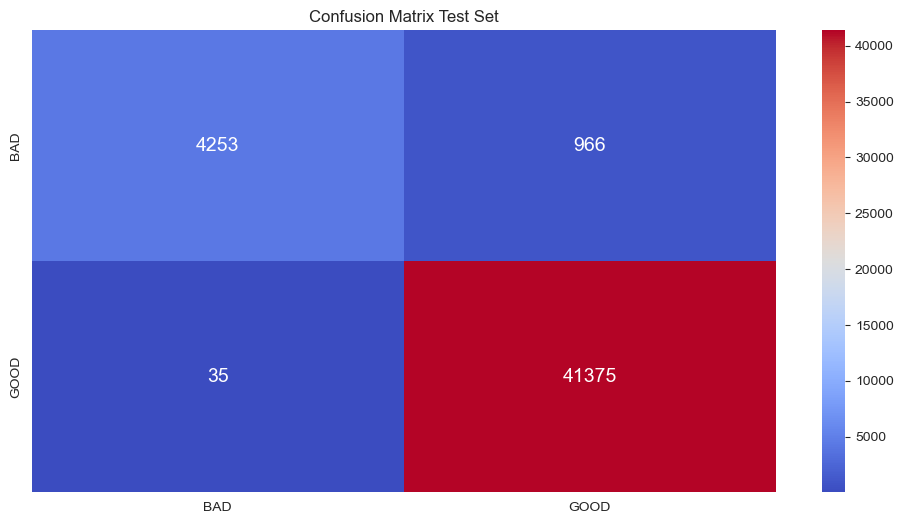

In [167]:
lr_results_over = show_all_metrics(lr, X_train_over, y_train_over, X_test, y_test)

              precision    recall  f1-score   support

           0       1.00      0.79      0.88      5219
           1       0.97      1.00      0.99     41410

    accuracy                           0.98     46629
   macro avg       0.99      0.90      0.94     46629
weighted avg       0.98      0.98      0.98     46629



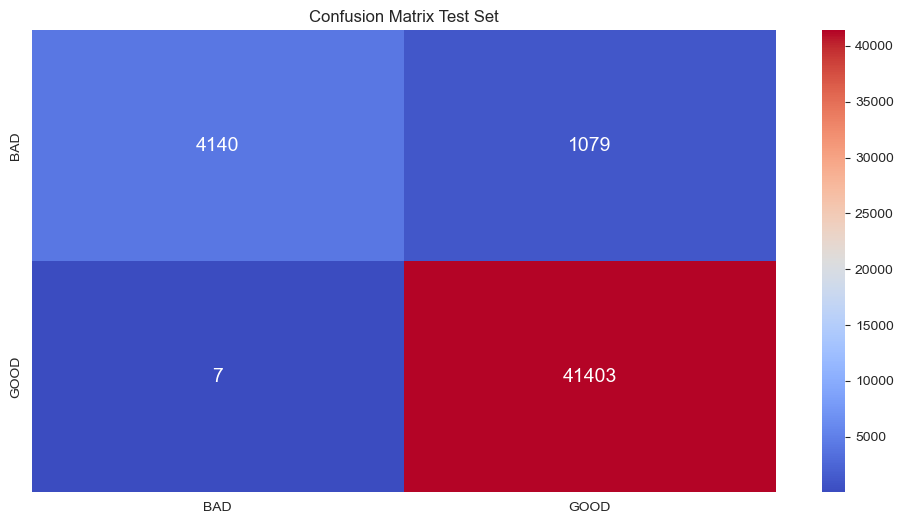

In [168]:
lr_results = show_all_metrics(lr, X_train, y_train, X_test, y_test)

In [173]:
metrics_df.loc["lr_over"] = lr_results_over
metrics_df.loc["lr"] = lr_results

              precision    recall  f1-score   support

           0       1.00      0.78      0.87      5219
           1       0.97      1.00      0.99     41410

    accuracy                           0.98     46629
   macro avg       0.99      0.89      0.93     46629
weighted avg       0.98      0.98      0.97     46629



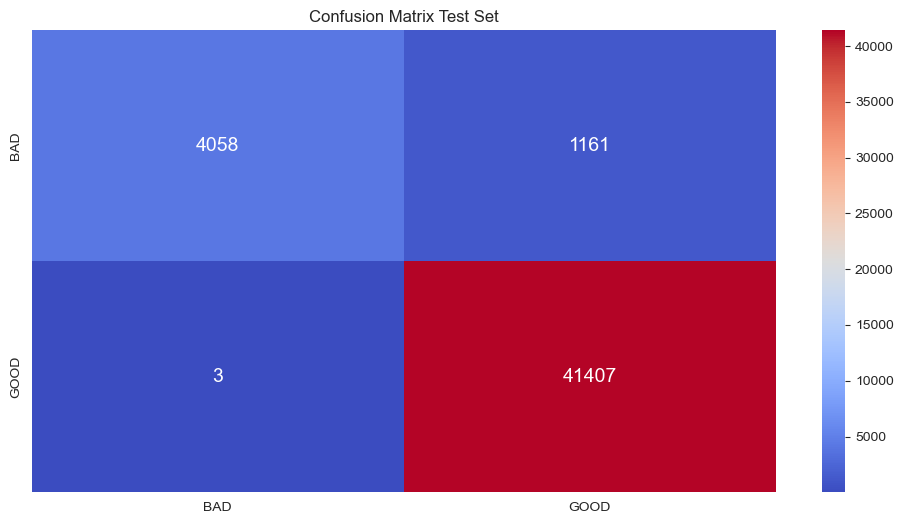

In [176]:
rf_results_over = show_all_metrics(rf, X_train_over, y_train_over, X_test, y_test)

              precision    recall  f1-score   support

           0       1.00      0.79      0.88      5219
           1       0.97      1.00      0.99     41410

    accuracy                           0.98     46629
   macro avg       0.99      0.89      0.93     46629
weighted avg       0.98      0.98      0.97     46629



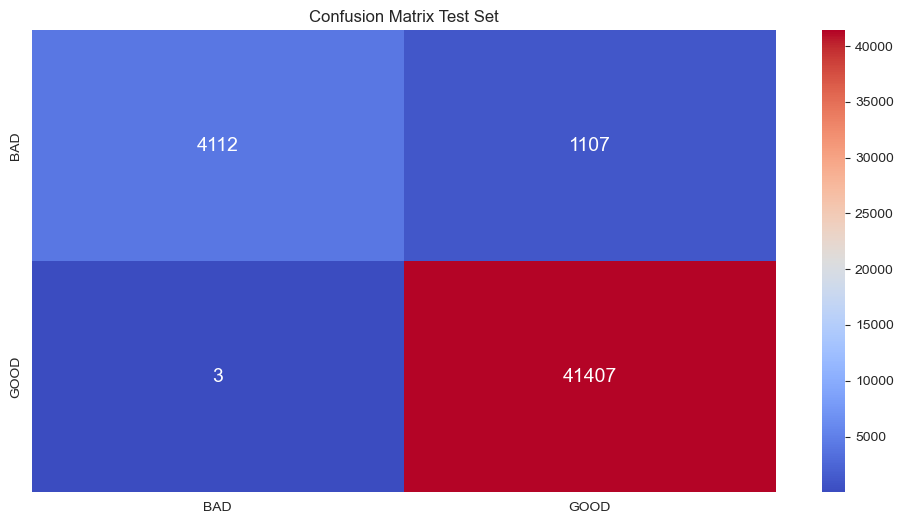

In [183]:
rf_results = show_all_metrics(rf, X_train, y_train, X_test, y_test)

In [184]:
metrics_df.loc["rf_over"] = rf_results_over
metrics_df.loc["rf"] = rf_results

In [188]:
metrics_df

accuracy  precision    recall  f1_score
lr_over  0.978533   0.984511  0.907031  0.941379
lr       0.976710   0.986457  0.896543  0.935552
rf_over  0.975037   0.985994  0.888736  0.930354
rf       0.976195   0.986616  0.893909  0.933927

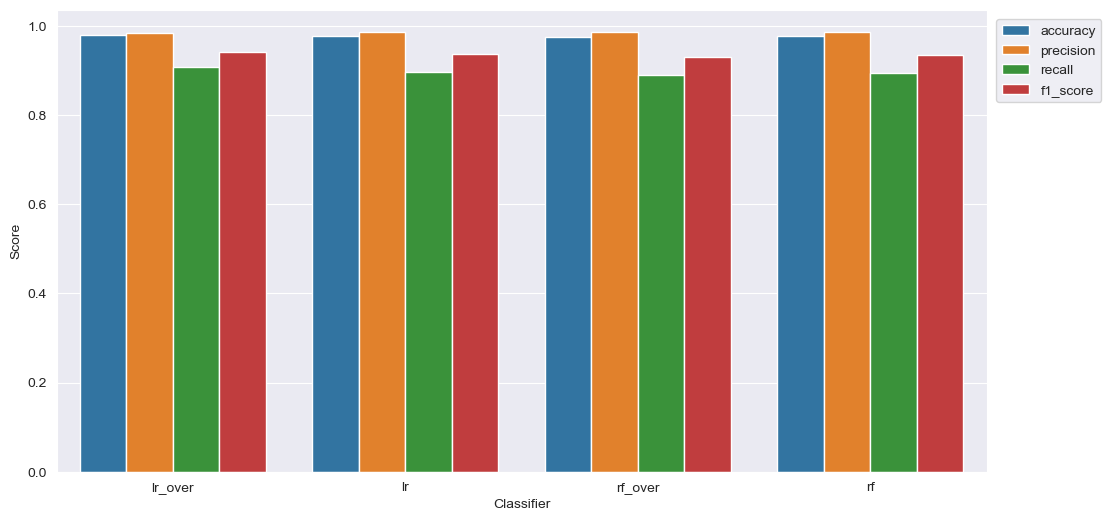

In [199]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=metrics_df.reset_index().melt(
        id_vars="index", var_name="Metric", value_name="Score"
    ),
    x="index",
    y="Score",
    hue="Metric",
)
plt.xlabel("Classifier")
plt.legend(loc=(1.01, 0.8))